<a href="https://colab.research.google.com/github/kevkirui/Moringa-Module-Project/blob/main/Suicide_Rate_Analysis_Group_Innovage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Disclaimer; This anaylysis does not provide advice of any kind or real life information. The contents are for informational purposes only and is not intended to be a substitute for professional medical or mental health advice, diagnosis, or treatment.

## ***Suicide Rates Analysis From 1985 to 2016***

## ***Defining The Question***

### a) Specifying the Data Analytic Question

Our aim for this study is to show suicide trends from the year 1985 to 2016 and support the agenda of suicide prevention across all divides.

### b) Defining the Metric for Success

In order to work on the above problem, I will need to do the following:

1. Find and deal with outliers, anomalies, and missing data within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing. This will need to be documented when writing the report. 

### c) Understanding the context 

The main objective of the project is to find the country with the highest suicide over the years from 1985 to 2016 and determine factors that affect suicide rates among different countries globally, across the socio-economic spectrum.

### d) Data Relevance

This dataset comprises of socio-economic information with suicide rates by year and country. We sourced the data from Kaggle. The dataset can be accessed here in this [link ](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)


## ***Column Definition***

* country: country of suicide

* year: year of suicide

* sex: gender

* age: age range of the person who committed suicide

* suicides_no: the raw number of reported suicides

* population: country population

* suicides_100k: suicides_no * 100k / population

* gdp_for_year: total monetary or market value of all final goods and services produced in a country in a given year

* gdp_per_capita: the ratio of real GDP to the average population of a specific year

## ***Importing our Libraries***

In [ ]:
# Importing numpy as np
import numpy as np

# Importing pandas as pd
import pandas as pd

# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import scipy

import scipy.stats as stats

# Import math

from math import sqrt

# import ttest 

from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm 


## ***Loading Datasets and Merging The Two Datasets***

In [ ]:
# Load and Previewing our Dataset 

df_suicide = pd.read_csv('master.csv')
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


If we add the regions and continents of the countries to our dataset, we will have a more detailed analysis opportunity. For this reason, we will use an auxiliary dataset from kaggle that contains country continent information.

In [ ]:
# Load and previewing the Continent Dataset

df_continent=pd.read_csv('continents.csv')
df_continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Find Mismatches

Before merging the two datasets, we need to detect and fix any mismatches in the country names. Let's write a function for this.

In [ ]:
# Find Mismatches 
# Before merging the two datasets, we need to detect and fix any mismatches in the country names

def mismatch (series_1, series_2, only_out=True):
    out_num = 0
    for i in series_1.unique():
        if i in series_2.unique():
#         if any(series_2.unique() == i):  # alternative
            if not only_out:
                print("in :",i)
        else:
            print("out :",i)
            out_num += 1
    print(f"{out_num} mismatch(es) between those dataframes".upper())
    
mismatch(df_suicide.country, df_continent.name, True)

out : Bosnia and Herzegovina
out : Macau
out : Republic of Korea
out : Russian Federation
out : Saint Vincent and Grenadines
5 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [ ]:
# Finding mismatches on the continent dataset

df_continent.loc[df_continent.name.str.contains("Bosnia"),'name']='Bosnia and Herzegovina'
df_continent.loc[df_continent.name.str.contains("Maca"),'name']='Macau'
df_continent.loc[df_continent.name.str.contains("Korea, Republic of"),'name']='Republic of Korea'
df_continent.loc[df_continent.name.str.contains("Russia"),'name']='Russian Federation'
df_continent.loc[df_continent.name.str.contains("Vincent"),'name']='Saint Vincent and Grenadines'
mismatch(df_suicide.country, df_continent.name, True)

0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


We merge two datasets over the country names column.

In [ ]:
# Merging out two datasets over the column

df = df_suicide.merge(df_continent[['name','region','sub-region','alpha-3']], left_on='country', right_on='name')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,name,region,sub-region,alpha-3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Albania,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Albania,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Albania,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Albania,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Albania,Europe,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Uzbekistan,Asia,Central Asia,UZB
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Uzbekistan,Asia,Central Asia,UZB
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Uzbekistan,Asia,Central Asia,UZB
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Uzbekistan,Asia,Central Asia,UZB


# ***Data Analysis***

Descriptive Analysis

In [ ]:
# Finding the summarry Statistics of our dataframe

df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
# Finding a quick summary of the shape, datatypes, unique values, null values, 
# the Minimum and Maximum values in our dataframe.

def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

Data shape: (27820, 16)
___________________________
Data Types:
object     10
int64       4
float64     2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
HDI for year,float64,8364,306,19456,0.483,0.944
gdp_for_year ($),object,27820,2321,0,"1,002,219,052,968","997,007,926"
age,object,27820,6,0,15-24 years,75+ years
alpha-3,object,27820,101,0,ABW,ZAF
country,object,27820,101,0,Albania,Uzbekistan
country-year,object,27820,2321,0,Albania1987,Uzbekistan2014
gdp_per_capita ($),int64,27820,2233,0,251,126352
generation,object,27820,6,0,Boomers,Silent
name,object,27820,101,0,Albania,Uzbekistan
population,int64,27820,25564,0,278,43805214


In [ ]:
df[" gdp_for_year ($) "] = df[" gdp_for_year ($) "].apply(lambda x: int(x.replace(',','')))

## ***Rename Columns***

Let's edit the column names

In [ ]:
# Listing our column names

df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'name',
       'region', 'sub-region', 'alpha-3'],
      dtype='object')

In [ ]:
# Renaming our columns

df = df.rename(columns={'suicides/100k pop':'suicides_100k',
                       'country-year':'country_year',
                       'HDI for year':'hdi_for_year',
                       ' gdp_for_year ($) ':'gdp_for_year',
                       'gdp_per_capita ($)':'gdp_per_capita',
                       'sub-region':'sub_region',
                       'alpha-3':'alpha_3'})
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k', 'country_year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'name', 'region', 'sub_region',
       'alpha_3'],
      dtype='object')

## ***Check unique values***

Let's check if there are any anomalies by checking the Unique values of the features.

In [ ]:
print('Unique Values of Features:\n')
for i in ['country','region','sub_region','age','generation','sex','year']:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Features:

country:
['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint

When sorted, let's change '5-14 years' to '05-14 years' so that it can sort in the correct hierarchy

In [ ]:
df.age = df.age.replace({'5-14 years':'05-14 years'})

## ***Handling Missing Values***

Let's check Missing Values. If the missing value is small, let's make 'filling' and if it is a large number, 'dropping'

In [ ]:
# Showing null value and their percentages

def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

,Missing_Records,Percentage (%)
hdi_for_year,19456,69.935298


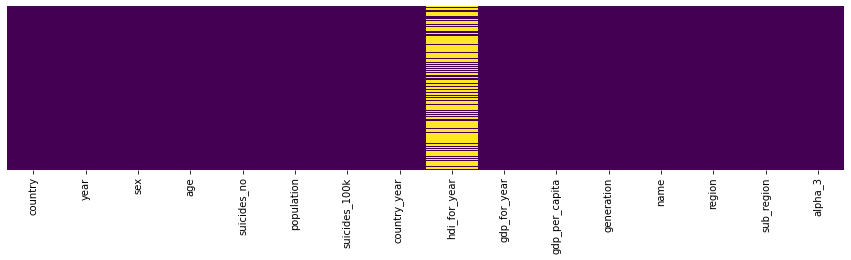

In [ ]:
# check number of null values and visualize it 

plt.figure(figsize=(15,3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
null_values(df)

# The column HDI per Year has 19456 missing values

In [ ]:
# Dropping the null values

df.drop('hdi_for_year',axis=1,inplace=True)
df.isnull().any().sum()

0

## ***Dropping Unnecessary Variables***

In [ ]:
# Dropping the Unnecessary columns

df[['country','year','country_year','name']]

,country,year,country_year,name
0,Albania,1987,Albania1987,Albania
1,Albania,1987,Albania1987,Albania
2,Albania,1987,Albania1987,Albania
3,Albania,1987,Albania1987,Albania
4,Albania,1987,Albania1987,Albania
...,...,...,...,...
27815,Uzbekistan,2014,Uzbekistan2014,Uzbekistan
27816,Uzbekistan,2014,Uzbekistan2014,Uzbekistan
27817,Uzbekistan,2014,Uzbekistan2014,Uzbekistan
27818,Uzbekistan,2014,Uzbekistan2014,Uzbekistan


Let's drop features that hold duplicate information

In [ ]:
# Dropping columns with duplicated values

df.drop(['country_year','name'],axis=1,inplace=True)

## ***Features Correlation of USA***

In [ ]:
# Generating a pivot table

df_USA = pd.pivot_table(df[df.country=='United States'],values= ['suicides_no','population'], 
               index=['year'], aggfunc='sum').reset_index()
df_USA['suicides_100k']=df_USA['suicides_no']/df_USA['population']*100000
df_USA['gdp_for_year']=df[df.country=='United States'].groupby('year').gdp_for_year.mean().values
df_USA['gdp_for_capita'] = df_USA['gdp_for_year'] / df_USA['population']

# df_USA

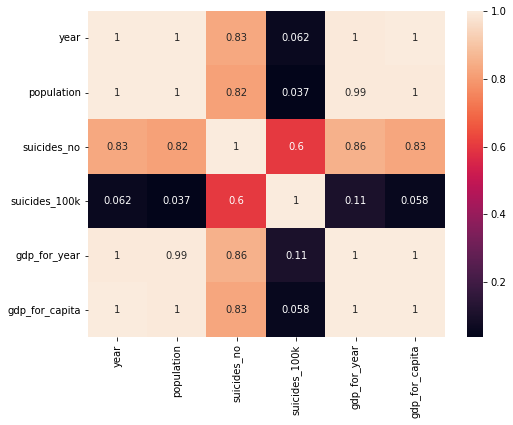

In [ ]:
# Generating a heatmap for our selected variables GDP per year and per capita, 
# population, year, suicide numbers and suicide per 100k in the USA. 

plt.subplots(figsize=(8,6))
sns.heatmap(df_USA.corr(), annot = True);

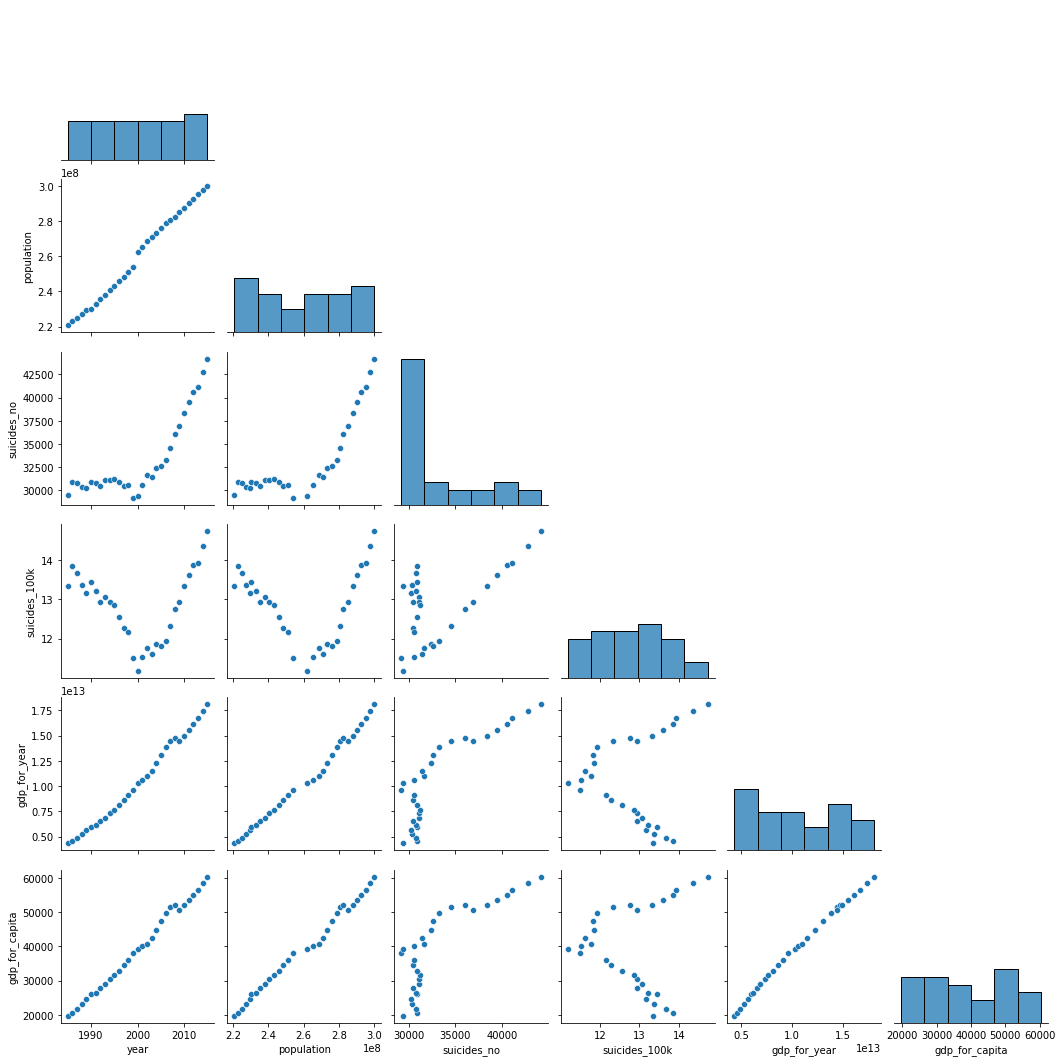

In [ ]:
# Generating pairplots for variables above in the USA.

sns.pairplot(df_USA, corner=True)

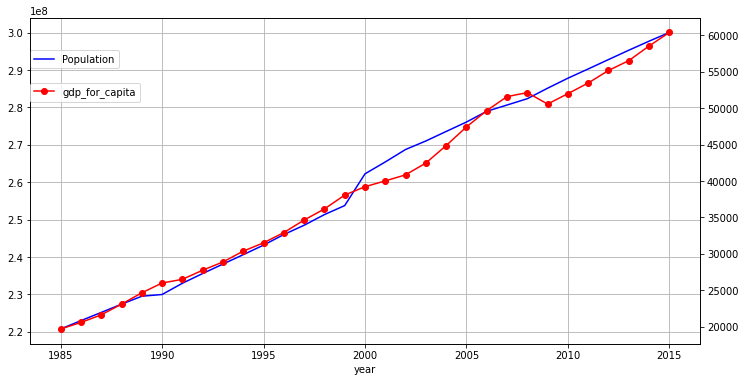

In [ ]:
# Plotting a chart to show the tragectory of population and GDP over the years in the USA

df_USA =df_USA.set_index('year')

fig, ax = plt.subplots(figsize=(12,6))
df_USA['population'].plot(ax=ax,color='b',label='Population',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_USA.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

As the population has increased in the USA over the years, the national income per capita has also increased.

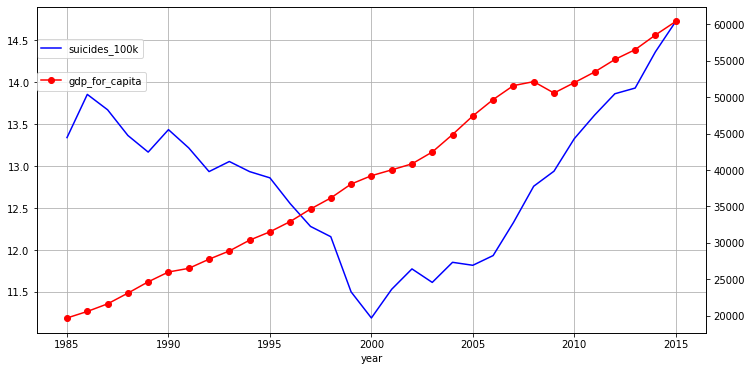

In [ ]:
# Plotting a chart to show trends over the years comparing the GDP per capita and suicide per 100k population

fig, ax = plt.subplots(figsize=(12,6))
df_USA['suicides_100k'].plot(ax=ax,color='b',label='suicides_100k',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_USA.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

While the suicide rate in the USA had a high negative correlation with national income until 2000, it had a high positive correlation after 2000. The year 2000 has been the breaking point.

***Features Correlation of All***

In [ ]:
# Generating a pivot table for all our countries

df_all_world = pd.pivot_table(df,values= ['suicides_no','population'], 
               index=['year'], aggfunc='sum').reset_index()
df_all_world['suicides_100k']=df_all_world['suicides_no']/df_all_world['population']*100000
df_all_world['gdp_for_year']=df.groupby('year').gdp_for_year.mean().values
df_all_world['gdp_for_capita'] = df_all_world['gdp_for_year'] / df_all_world['population']

# df_all_world

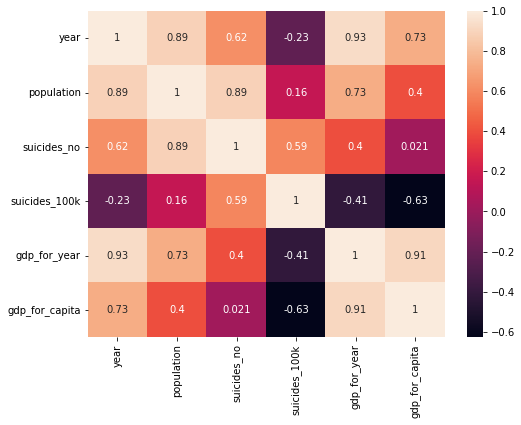

In [ ]:
# Generating a heatmap to show all counties and different factors affecting suicide rates 

plt.subplots(figsize=(8,6))
sns.heatmap(df_all_world[df_all_world.year!=2016].corr(), annot = True)

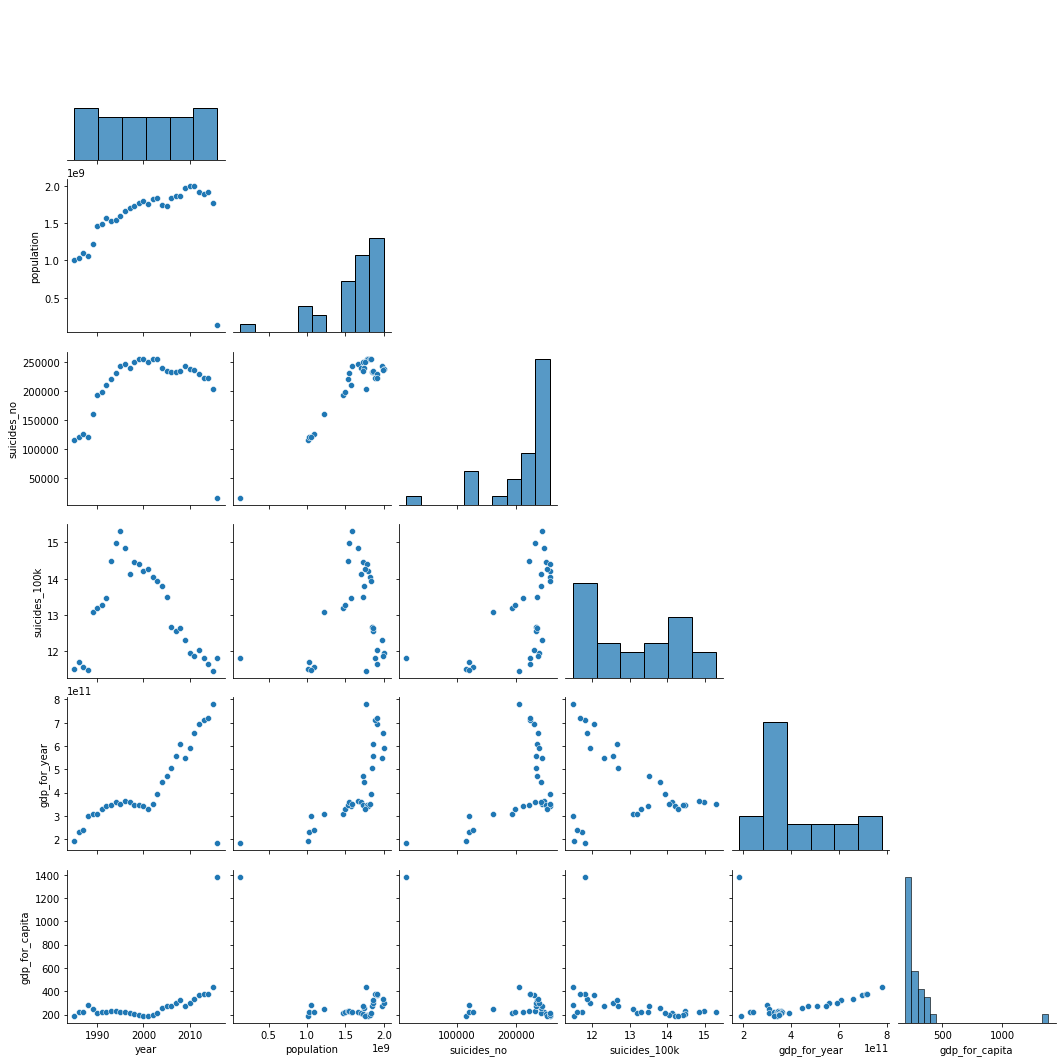

In [ ]:
# below is a summary of all our numerical variables and their relationship with each other.

sns.pairplot(df_all_world,corner=True)

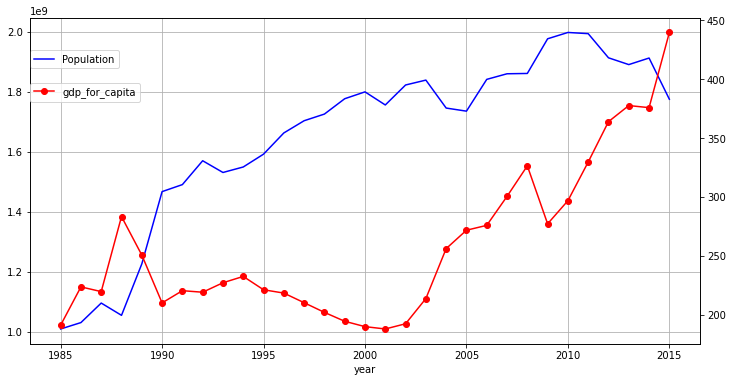

In [ ]:
# Showing the trends of population and GDP per capita of our countries.

df_all_world =df_all_world[df_all_world.year!=2016].set_index('year')

fig, ax = plt.subplots(figsize=(12,6))
df_all_world['population'].plot(ax=ax,color='b',label='Population',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_all_world.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

* Since 2016 data is too incomplete, it is not included in the image as it may provide incorrect insight.
* While the world's per capita income was fluctuating until the beginning of the 2000s, it tended to increase after this date, except for the 2007 financial crisis.
* Although the population always tends to increase according to the graph, there has been a tendency to decrease after 2010. It should be taken into account that this may be due to the lack of dataset.

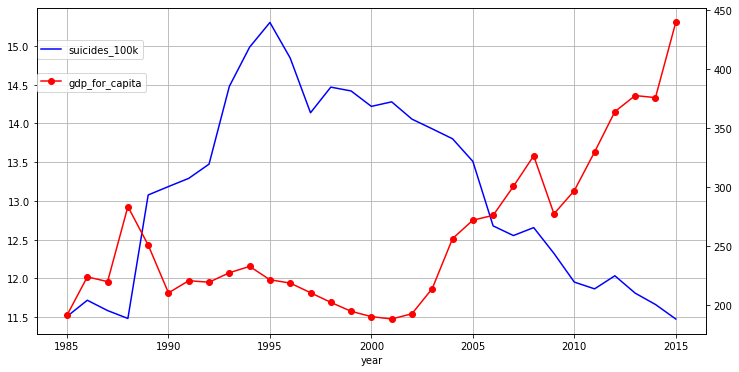

In [ ]:
# Showing the trends of Suicide per 100k and GDP per capita of our countries.

fig, ax = plt.subplots(figsize=(12,6))
df_all_world['suicides_100k'].plot(ax=ax,color='b',label='suicides_100k',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_all_world.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

* Since 2016 data is too incomplete, it is not included in the image as it may provide incorrect insight.
* While suicide rates tended to increase all over the world until 1995, they tended to decrease sharply after 1995.
* While the world's per capita income was fluctuating until the beginning of the 2000s, it tended to increase after this date, except for the 2007 financial crisis.

## ***Data Visualization in Detail***

### ***Suicide Counts by Gender***

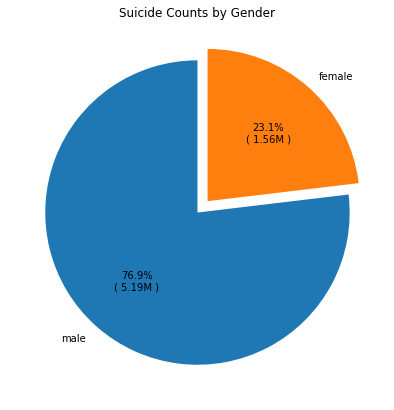

In [ ]:
# Plotting a pie chart showing the suicide rates per gender

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n( {:.2f}M )".format(pct,round(absolute/1000000,2))

suicide_counts_by_sex = df.groupby('sex').suicides_no.sum()

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x = suicide_counts_by_sex.values[::-1], 
        labels=suicide_counts_by_sex.index[::-1], 
       explode=(0, 0.1),
       autopct=lambda pct: func(pct, suicide_counts_by_sex.values[::-1]),
       startangle=90)
ax.set_title("Suicide Counts by Gender");
plt.show()

The total number of women who commit suicide is about 1/3 of the men who commit suicide

## ***Suicide Rates by Regions***

Text(0.5, 1.0, 'Suicide Rates by Regions')

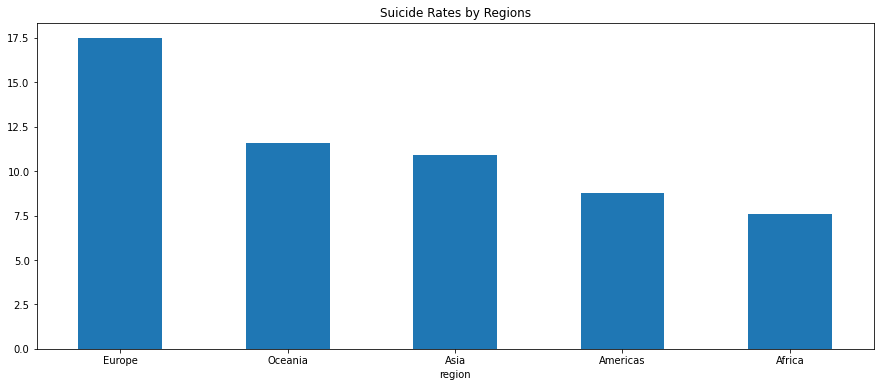

In [ ]:
# Plotting a bar chart Showing suicide rates per region

plt.subplots(figsize=(15,6))
df.groupby('region').suicides_100k.mean().sort_values(ascending=False).plot.bar(rot=0)
plt.title("Suicide Rates by Regions")

European society is more prone to suicide



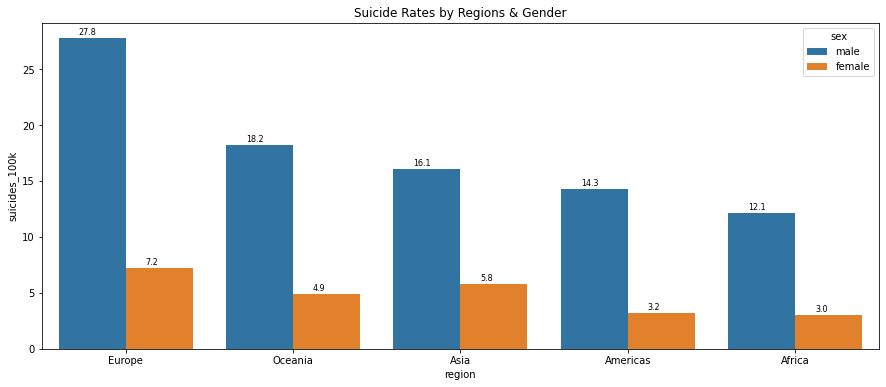

In [ ]:
# Showing suicide rates by regions and gender 

def labels(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.12, p.get_height()+0.3), size=8)

plt.subplots(figsize=(15,6))
df_reg = pd.DataFrame(df.groupby(['region','sex']).suicides_100k.mean().sort_values(ascending=False)).reset_index()
ax = sns.barplot(x='region',y='suicides_100k',data=df_reg, hue='sex')
plt.title("Suicide Rates by Regions & Gender")
labels(ax,df_reg)

While we find that men are more suicidal in male-female suicide, this difference is relatively small in Asia.

## ***Suicide Rates by Sub-Regions***

Text(0.5, 1.0, 'Suicide Rates by Sub-Regions')

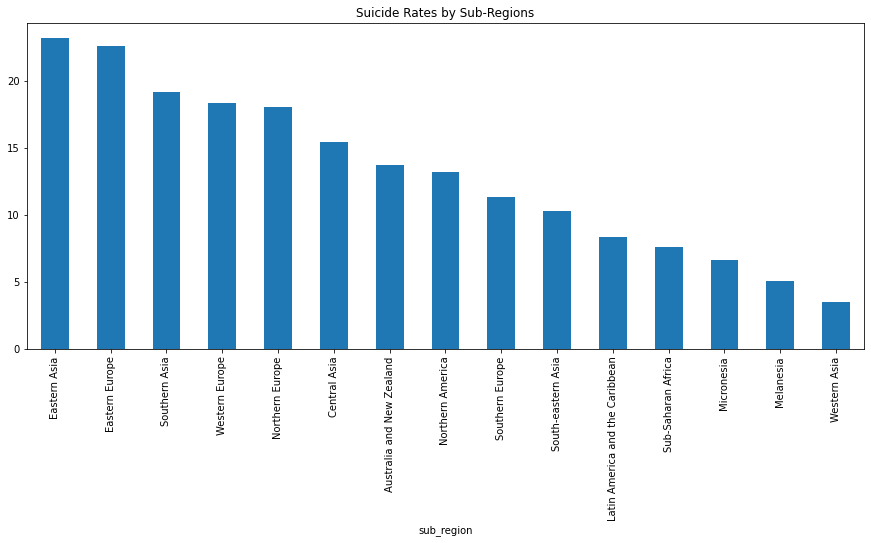

In [ ]:
# Showing a bar chart with suicide rates per sub regions

plt.subplots(figsize=(15,6))
df.groupby('sub_region').suicides_100k.mean().sort_values(ascending=False).plot.bar(rot=90)
plt.title("Suicide Rates by Sub-Regions")

On a Sub-Region basis, East Asia has higher suicide rates than Europe, as it has the highest suicide rate in the world.

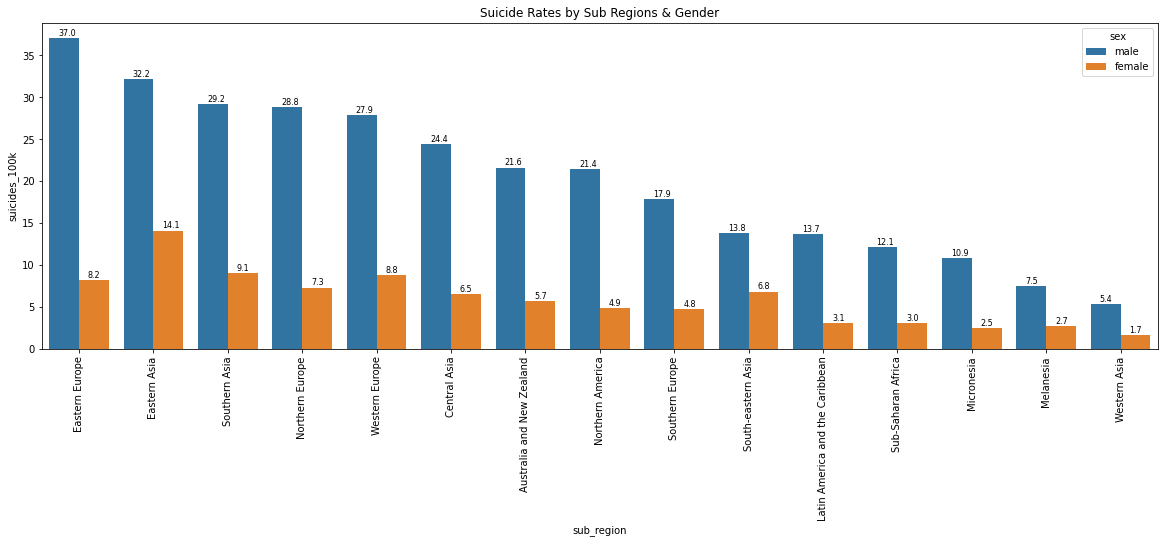

In [ ]:
# Showing a bar chart with suicide rates per sub regions and gender

def labels(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.12, p.get_height()+0.3), size=8)

fig,ax = plt.subplots(figsize=(20,6))
df_subreg = pd.DataFrame(df.groupby(['sub_region','sex']).suicides_100k.mean().sort_values(ascending=False)).reset_index()
ax = sns.barplot(x='sub_region',y='suicides_100k',data=df_subreg, hue='sex')
ax.set_title("Suicide Rates by Sub Regions & Gender")
ax.set_xticklabels(df_subreg.sub_region.unique(),rotation=90)
labels(ax,df_subreg)

Looking at the previous chart in gender detail, it is seen that there are female suicide rates in East Asia that are above the world average.

## ***Average Suicide Rates by Country from 1985 to 2016***

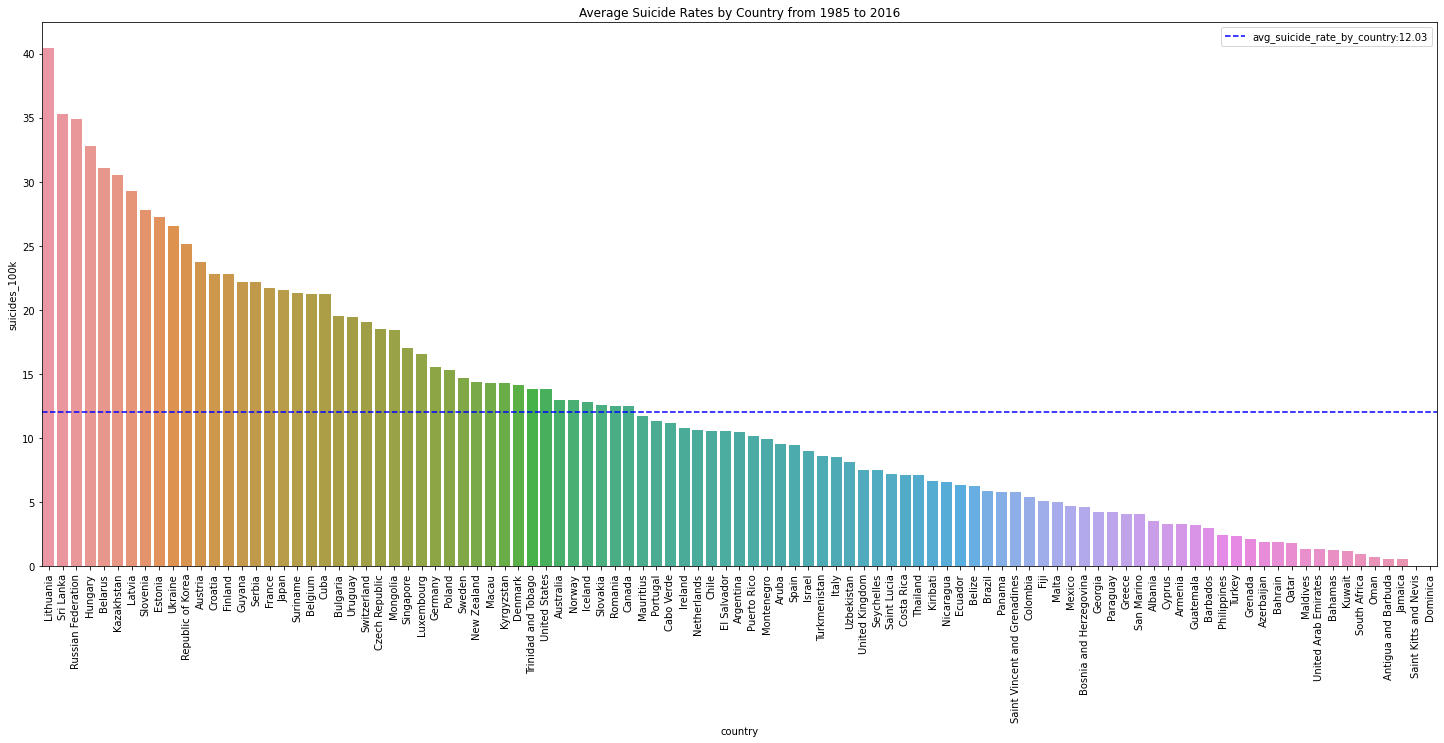

In [ ]:
# Showing average suicide per country 


df_cavg = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['country' ]).sort_values(by=['suicides_100k'],ascending=False)


fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=df_cavg.index, y='suicides_100k', data=df_cavg)
ax.set_title("Average Suicide Rates by Country from 1985 to 2016")
ax.axhline(y=df_cavg.mean()[0], color="blue", ls="--",label=f'avg_suicide_rate_by_country:{round(df_cavg.mean()[0],2)}')
ax.set_xticklabels(df_cavg.index, rotation=90)
ax.legend();

Looking at the average suicide rates for the years 1985-2016 by country, Lithuania is the country with the highest suicide rate.

## ***Suicide Counts by Country in 2015***

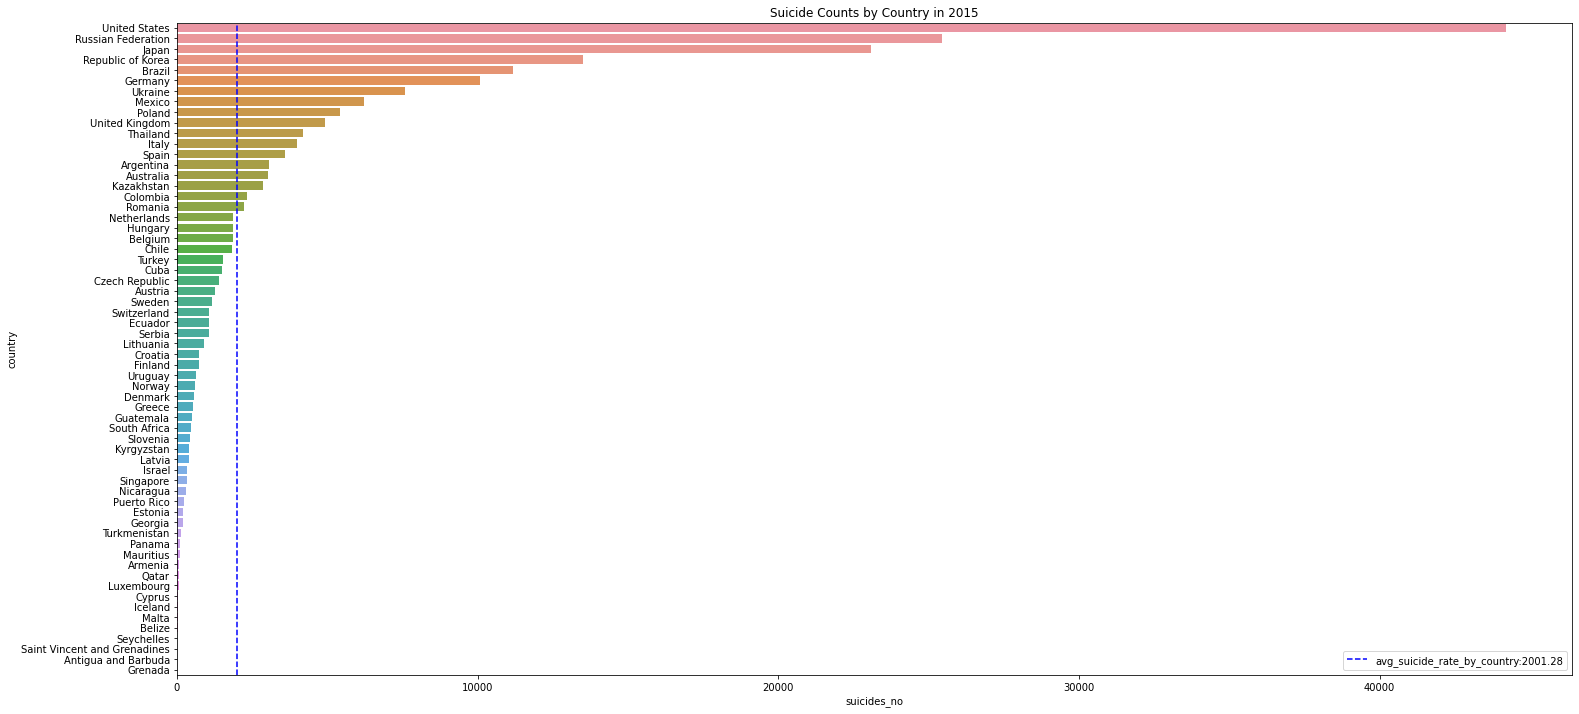

In [ ]:
# Showing number of suicides per country in 2015

df_cys = pd.pivot_table(df,values= ['suicides_no'], 
               index=['country', 'year', ], aggfunc='sum').reset_index()


fig, ax = plt.subplots(figsize=(25,12))
sns.barplot(y='country', x='suicides_no', data=df_cys[df_cys.year==2015].sort_values(by='suicides_no', ascending=False))
ax.set_title("Suicide Counts by Country in 2015")
ax.axvline(x=df_cys.mean()[0], color="blue", ls="--",label=f'avg_suicide_rate_by_country:{round(df_cys.mean()[0],2)}')
ax.legend()

Since the 2016 data are missing, the 2015 data with full data was focused on. Considering the total number of suicides, the highest number of suicides occurred in the USA-Russia-Japan order. However, this can be misleading. Because these countries are countries with large populations, we cannot say, for example, that USA is the country with the highest suicidal tendency. We have to look at the suicide rate in 100,000.

## ***Suicide Rates by Country in 2015***

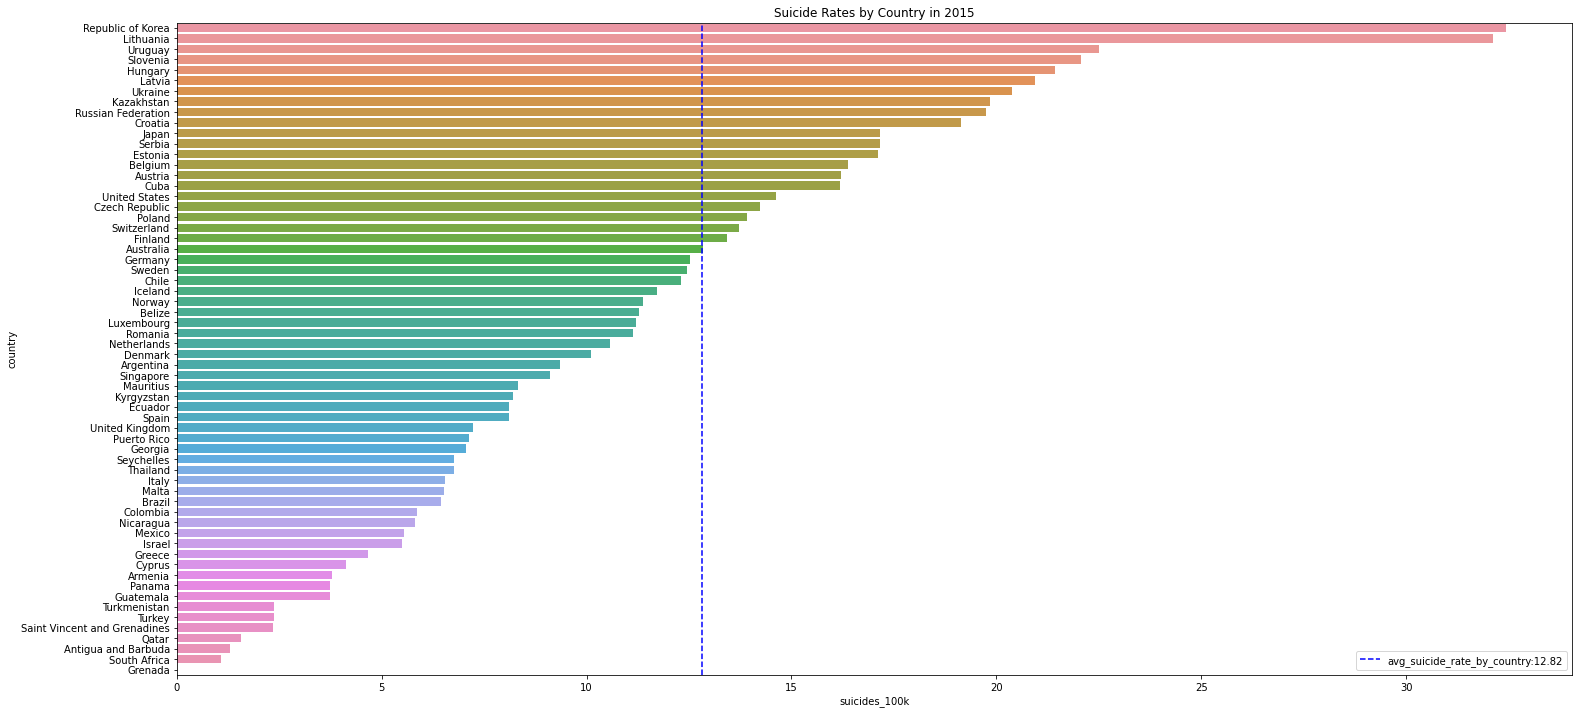

In [ ]:
# Showing suicide rates 100k population per country in the 2015

df_cysr = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['country', 'year', ], aggfunc='mean').reset_index()


fig, ax = plt.subplots(figsize=(25,12))
sns.barplot(y='country', x='suicides_100k', data=df_cysr[df_cysr.year==2015].sort_values(by='suicides_100k', ascending=False))
ax.set_title("Suicide Rates by Country in 2015")
ax.axvline(x=df_cysr.suicides_100k.mean(), color="blue", ls="--",label=f'avg_suicide_rate_by_country:{round(df_cysr.suicides_100k.mean(),2)}')
ax.legend();
plt.show()


According to 2015 data, the Republic of Korea and Lithuania are by far the countries with the highest suicide rates in the world.

## ***suicides_100k rates by Generations***

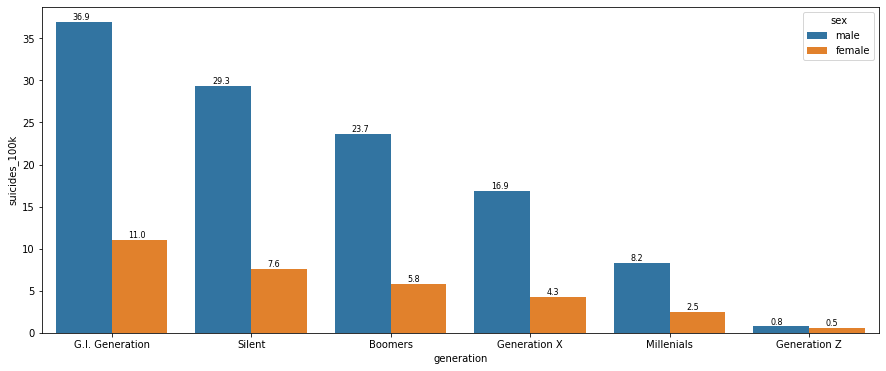

In [ ]:
# Showing the suicide rates per 100k population in different generations and the gender.

df_gs = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['generation', 'sex', ])


def labels(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.12, p.get_height()+0.3), size=8)


fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='generation', y='suicides_100k',hue='sex',
                 data=df_gs.sort_values(by=['suicides_100k'], ascending=False).reset_index())
labels(ax,df_gs.suicides_100k)

While G.I. Generation born between 1910 and 1924 has the highest suicide rate, this rate gradually decreases in later generations.

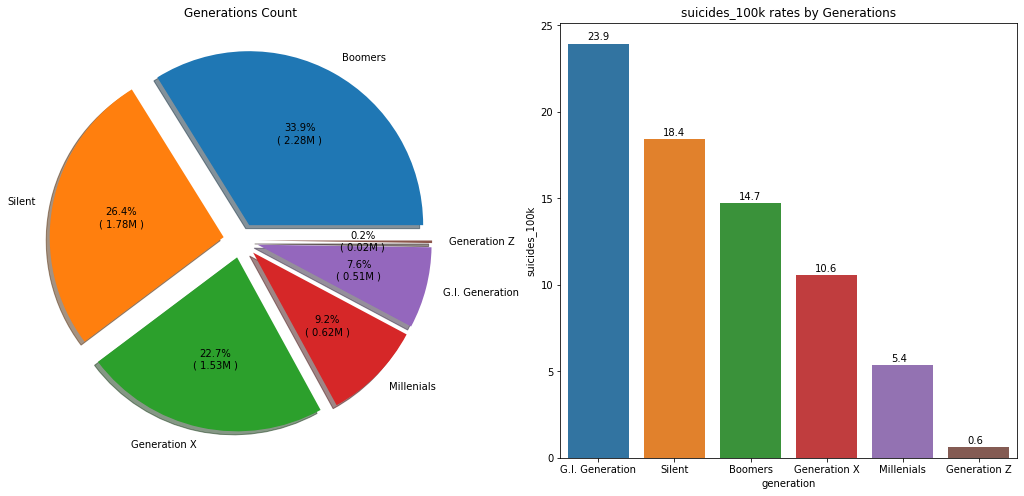

In [ ]:
# Generating a pivot table 
# Showing suicide rate per generation
# and showing suicide number in each generation 

df_g = pd.pivot_table(df,values= ['suicides_100k'], index=['generation' ],aggfunc='mean')
df_s = pd.pivot_table(df,values= ['suicides_no'], index=['generation' ],aggfunc='sum')
df_s = df_s.merge(df_g,on='generation').sort_values(by=['suicides_no'],ascending=False)

def label(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.25, p.get_height()+0.2),size=10)

fig,ax=plt.subplots(1,2,figsize=(18,8))
df_s['suicides_no'].plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],labels= df_s.index,ax=ax[0],shadow=True,
                            autopct=lambda pct: func(pct, df_s['suicides_no']))
# Alternative
# ax[0].pie(x = df_s['suicides_no'], 
#         labels = df_s.index, 
#        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
#        autopct=lambda pct: func(pct, df_s['suicides_no']),
#        startangle=160)

ax[0].set_title('Generations Count')
ax[0].set_ylabel('')

sns.barplot(x=df_s.sort_values(by=['suicides_100k'],ascending=False).index,y='suicides_100k',
            data=df_s.sort_values(by=['suicides_100k'],ascending=False), ax=ax[1]);
ax[1].set_title('suicides_100k rates by Generations')
label(ax[1])
plt.show()

* The pie chart shows the generational distribution of the total number of suicides between 1985 and 2016. Boomers (born 1946-1964) are the generation with the highest number of suicides
* The bar graph shows the suicide rate among the generations between 1985 and 2016. Here G.I. Generation(born between 1910-1924) has the highest suicide rate. When we multiply the suicide numbers on the pie chart into their populations, we get the suicide rates on the bar graph.

## ***Suicide Rates by Age Group***

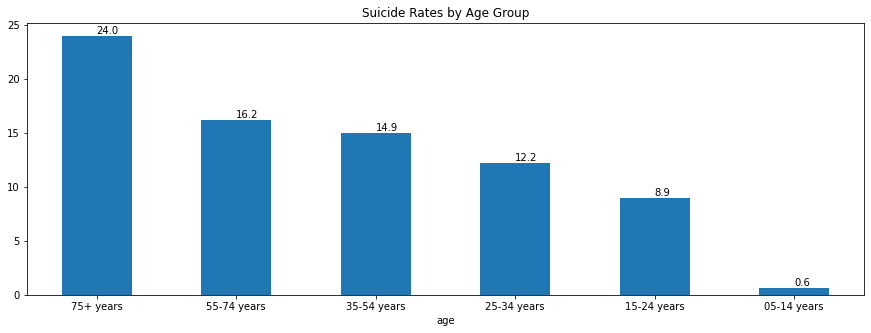

In [ ]:
# Suicide rate per different age group

fig,ax=plt.subplots(figsize=(15,5))
df.groupby('age').suicides_100k.mean().sort_values(ascending=False).plot.bar(rot=0, ax=ax)
ax.set_title("Suicide Rates by Age Group")
label(ax)

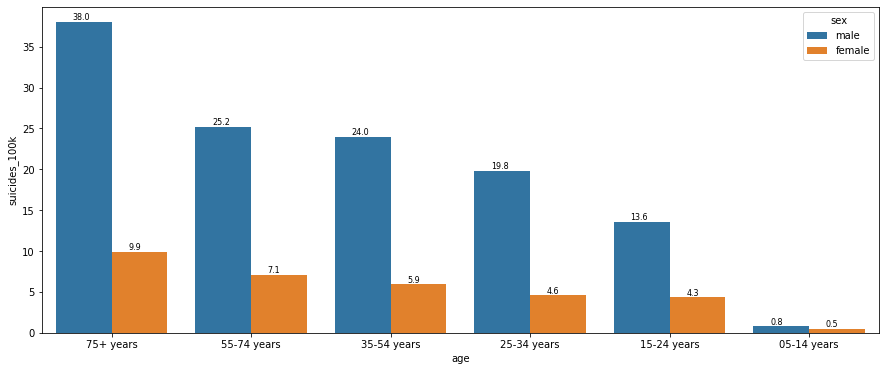

In [ ]:
# Gender, their age group and their suicide rate per 100k population

df_as = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['age', 'sex', ])


fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='age', y='suicides_100k',hue='sex',
                 data=df_as.sort_values(by=['suicides_100k'], ascending=False).reset_index())
labels(ax,df_gs.suicides_100k)

In [ ]:
# Generating a pivot table comparing age, suicide number and suicides per 100k

df_a = pd.pivot_table(df,values= ['suicides_100k'], index=['age' ])
df_sa = pd.pivot_table(df,values= ['suicides_no'], index=['age' ],aggfunc='sum')
df_sa = pd.concat([df_a, df_sa], axis=1).sort_values(by=['suicides_no'],ascending=False)
df_sa

,suicides_100k,suicides_no
age,,
35-54 years,14.947441,2452141
55-74 years,16.155579,1658443
25-34 years,12.186885,1123912
15-24 years,8.947154,808542
75+ years,23.955409,653118
05-14 years,0.620041,52264


Suicide rate increases with age

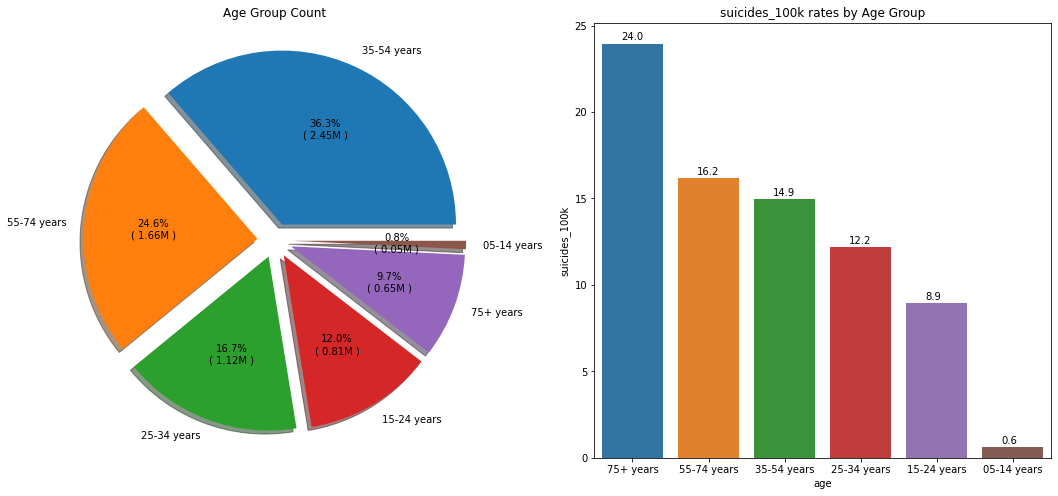

In [ ]:
# showing suicide rates per 100k in each age group

fig,ax=plt.subplots(1,2,figsize=(18,8))
df_sa['suicides_no'].plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],labels= df_sa.index,ax=ax[0],shadow=True,
                              autopct=lambda pct: func(pct, df_s['suicides_no']))
ax[0].set_title('Age Group Count')
ax[0].set_ylabel('')

sns.barplot(x=df_sa.sort_values(by=['suicides_100k'],ascending=False).index,y='suicides_100k',data=df_sa.sort_values(by=['suicides_100k'],ascending=False), ax=ax[1]);
ax[1].set_title('suicides_100k rates by Age Group')
label(ax[1])
plt.show()

* The pie chart shows the distribution of the total number of suicides between 1985 and 2016 by age group. The generation aged 35-54 with the highest number of suicides
* The bar graph shows the suicide rate among the age groups between 1985 and 2016. Here, over 75 years old has the 'highest suicide rate'. When we multiply the suicide numbers on the pie chart into their populations, we get the suicide rates on the bar graph.

## ***Suicide Rates by Years***

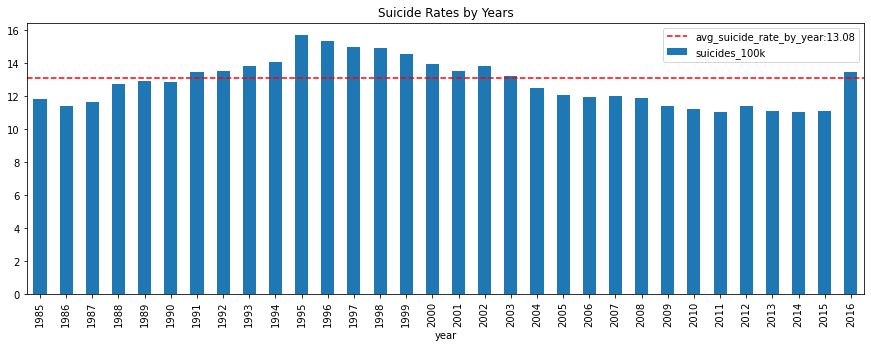

In [ ]:
# Plotting a chart showing suicides rate over the years

avg_suicide_rate_by_year= df.groupby('year').suicides_no.sum() / df.groupby('year').population.sum()*100000

fig, ax = plt.subplots(figsize=(15,5))
df.groupby('year').suicides_100k.mean().plot.bar(ax=ax)
ax.set_title("Suicide Rates by Years")
ax.axhline(y=avg_suicide_rate_by_year.mean(), color="red", ls="--",
           label=f'avg_suicide_rate_by_year:{round(avg_suicide_rate_by_year.mean(),2)}')
ax.legend()

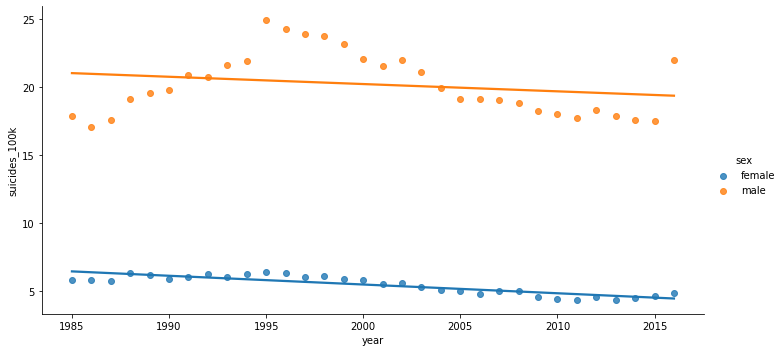

In [ ]:
# Showing the trend of suicide rates of each gender over the years

df1 = df.groupby(['year','sex']).suicides_100k.mean()
df1 = pd.DataFrame(df1).reset_index()

sns.lmplot(x="year", y="suicides_100k", hue="sex",
               truncate=True, height=5, aspect=2, data=df1, ci=None)

Over the years, suicide rates tended to increase for men up to 1995 and then tended to fall, while for women they tended to decline in general.

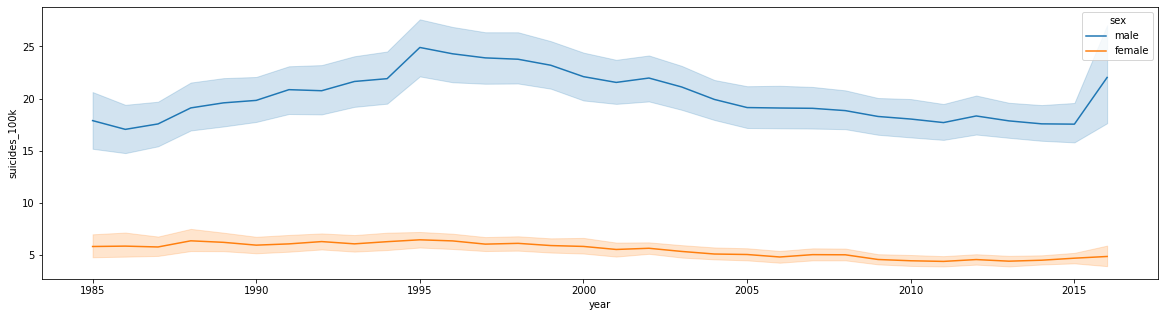

In [ ]:
# A lineplot showing the trend of suicide rates of each gender over the years

df2 = pd.pivot_table(df,values= ['suicides_100k','population','gdp_per_capita'], 
                     index=['country','sex','age','year' ]).sort_index(level=[2],ascending=False)


plt.figure(figsize=(20,5))
sns.lineplot(x="year", y="suicides_100k",hue="sex",data=df2)

(-10.0, 50.0)

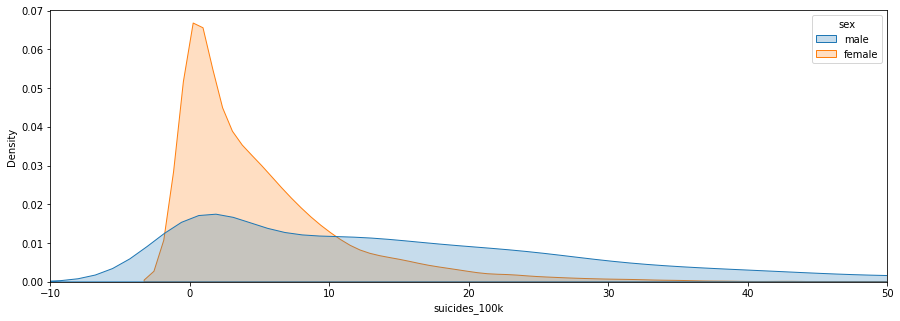

In [ ]:
# A areachat showing the trend of suicide rates of each gender per 100k population.

plt.figure(figsize=(15,5))
sns.kdeplot(x='suicides_100k',data=df2.reset_index(), hue='sex', shade=True)
plt.xlim([-10,50])

While the standard deviation is low in female suicide data, it is higher in males.

## ***Suicide Counts by Years***

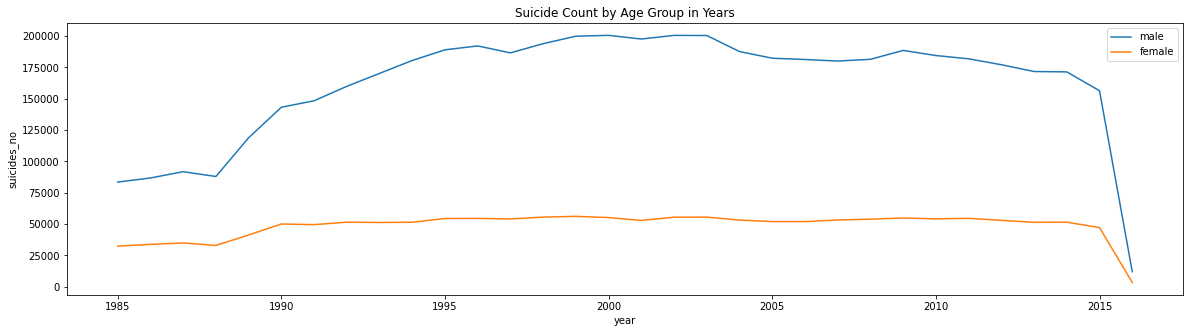

In [ ]:
# A linegraph showing the trend of the number of suicides of each gender over the years 

df_ss = pd.pivot_table(df,values= ['suicides_no'], 
                     index=['sex','year'], aggfunc='sum').reset_index()
fig, ax = plt.subplots(figsize=(20,5))
for i in ['male','female']:
    ax = df_ss[df_ss.sex==i].groupby('year').suicides_no.sum().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_no')
ax.set_title('Suicide Count by Age Group in Years')
plt.show()

Since there is missing data in 2016, after 2015 should not be taken into account in this chart.

## ***GDP per Capita by Country in Descending Order***

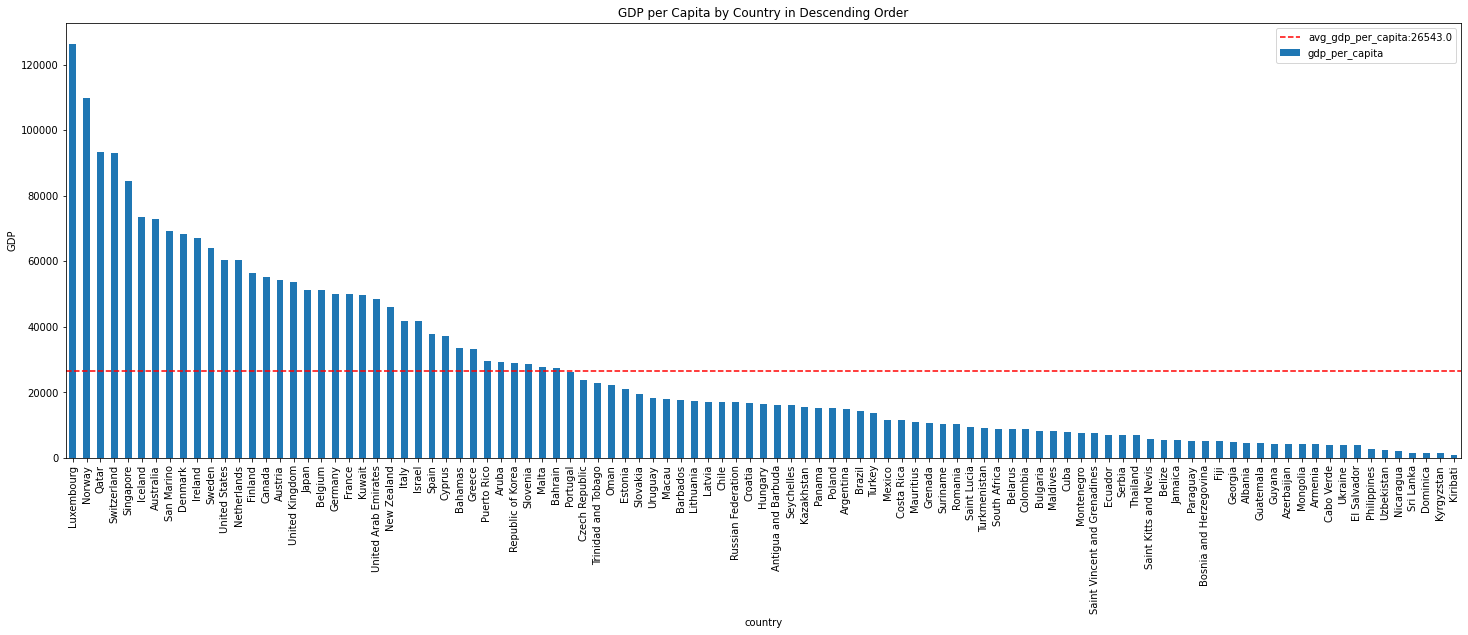

In [ ]:
# Generating a pivot table comparing population and GDP per capita
# Generating a bar chart

df_gp = pd.pivot_table(df,values= ['population','gdp_per_capita'], 
                     index=['country'], aggfunc='max').sort_values(by=['gdp_per_capita'],ascending=False)


fig, ax = plt.subplots(figsize=(25,8))
df_gp.gdp_per_capita.plot.bar(ax=ax)
ax.set_title("GDP per Capita by Country in Descending Order")
ax.axhline(y=df_gp.gdp_per_capita.mean(), color="red", ls="--",
           label=f'avg_gdp_per_capita:{round(df_gp.gdp_per_capita.mean(),2)}')
ax.set_ylabel('GDP')
ax.legend()

The countries with the highest per capita income are Luxembourg, Norway and Qatar, respectively.

## ***Suicide Rate in Top 5 countries by GDP in Years***



In [ ]:
# Generating a pivot table with and GDP per capita suicides per 100k

df_yc = pd.pivot_table(df,values= ['suicides_100k','gdp_per_capita'], 
                     index=['country','year']).reset_index()

df_yc['gdp_per_capita_max']=df_yc.groupby('country').gdp_per_capita.transform(max)
country_order_gdp = df_yc[['country','gdp_per_capita_max']].drop_duplicates().sort_values(by=['gdp_per_capita_max'],ascending=False)['country'].values

# country_order_gdp

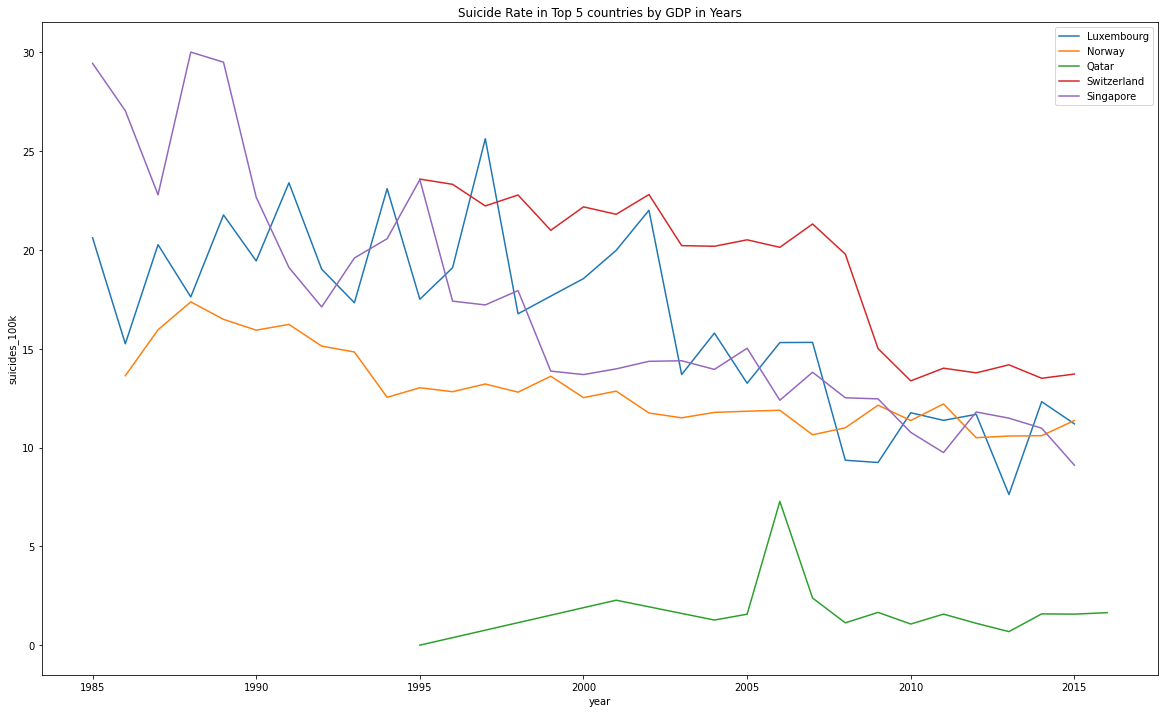

In [ ]:
# Plotting a line graph showing the top 5 countries and their suicide rate

fig, ax = plt.subplots(figsize=(20,12))
for i in country_order_gdp[:5]:
    ax = df_yc[df_yc.country==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_title('Suicide Rate in Top 5 countries by GDP in Years')
ax.set_ylabel('suicides_100k')
plt.show()

You can see that the suicide rates of the 5 countries with the highest GDP change over time, with the exception of Qatar, the overall suicide rate tends to decrease.

## ***Suicide Rate by Generations in Years***

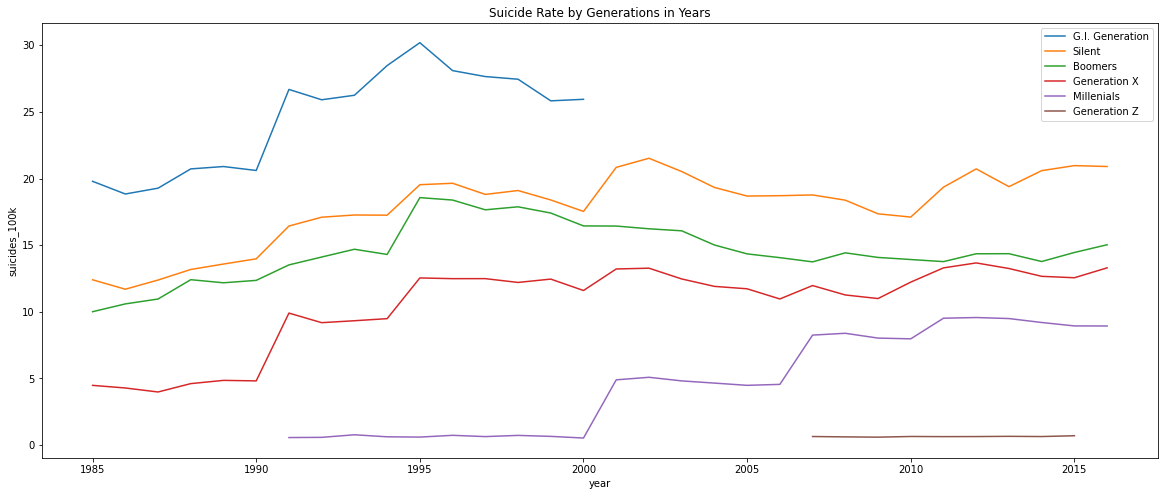

In [ ]:
# Plotting a line graph showing the generation and their suicide rate per 100k over the years

df_sayg = pd.pivot_table(df,values= ['suicides_100k','gdp_per_capita'], 
                     index=['sex','age','year','generation']).reset_index()


fig, ax = plt.subplots(figsize=(20,8))
for i in ['G.I. Generation', 'Silent','Boomers','Generation X', 'Millenials','Generation Z']:
    ax = df_sayg[df_sayg.generation==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('Suicide Rate by Generations in Years')
plt.show()

Let's visualize the Suicide Rate by Generation over the Years in gender detail

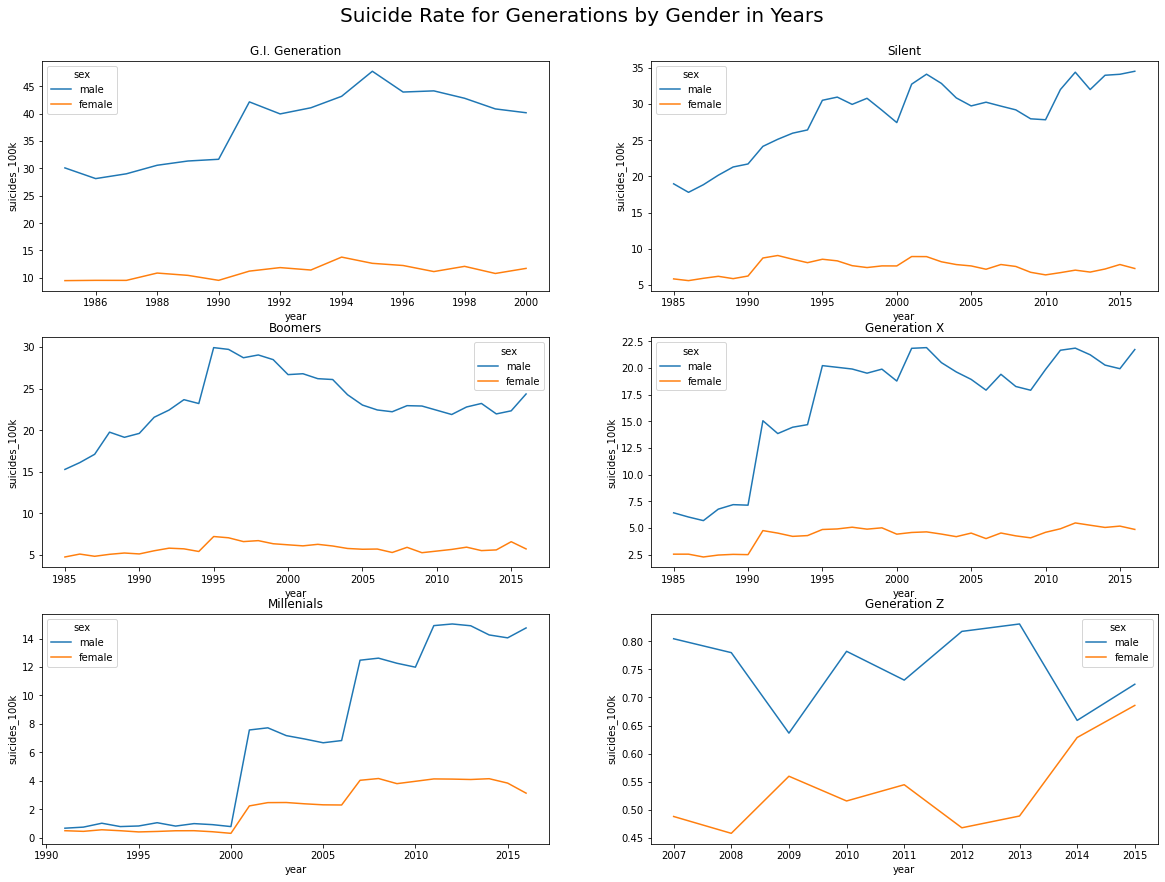

In [ ]:
# Plotting a line graph showing different genders in each generation and their suicide rates

df_sayg = pd.pivot_table(df,values= ['suicides_100k'], 
                     index=['sex','age','year','generation']).sort_index(level=3, ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle("Suicide Rate for Generations by Gender in Years", fontsize=20).set_y(0.9)
fig.subplots_adjust(top=0.85)
for i,v in enumerate(['G.I. Generation', 'Silent','Boomers','Generation X', 'Millenials','Generation Z']):
    plt.subplot(3,2,i+1)
    sns.lineplot(x='year', y='suicides_100k', hue='sex',data=df_sayg[df_sayg.generation==v], ci=None)
    plt.title(v)
plt.show()

While the gap in the suicide rates of generations on a male-female basis generally tends to increase over the years, there is a tendency to decrease dramatically in generation Z since 2013.

## ***Suicide Rate by Age Group in Years***

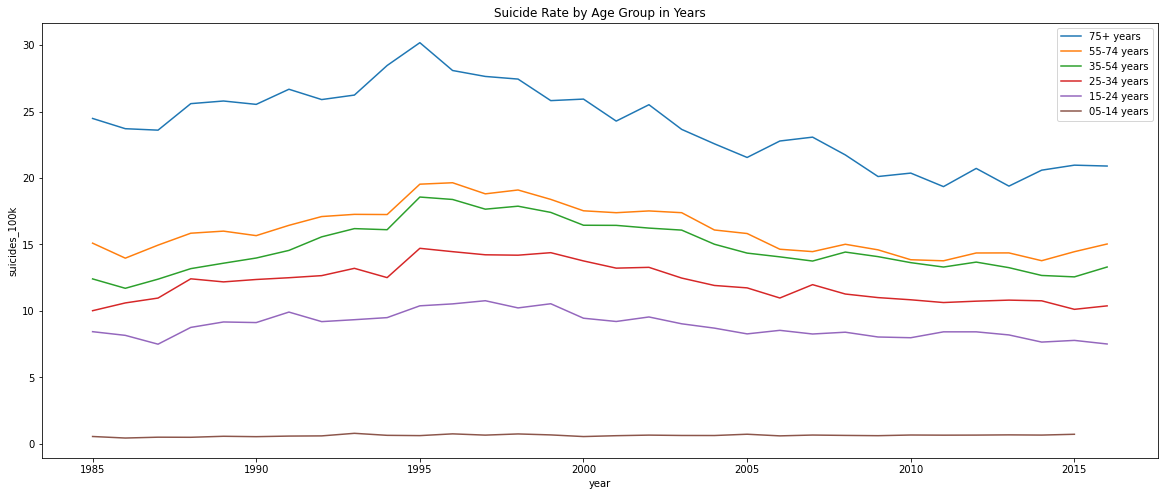

In [ ]:
# Plotting a line graph different age groups and their suicide rates

fig, ax = plt.subplots(figsize=(20,8))
for i in ['75+ years', '55-74 years','35-54 years','25-34 years','15-24 years', '05-14 years']:
    ax = df_sayg[df_sayg.age==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('Suicide Rate by Age Group in Years')
plt.show()

While suicide rates of age groups peaked in 1995, they generally continued to decline in the following years.

## ***Suicide Count by Age Group in Years***

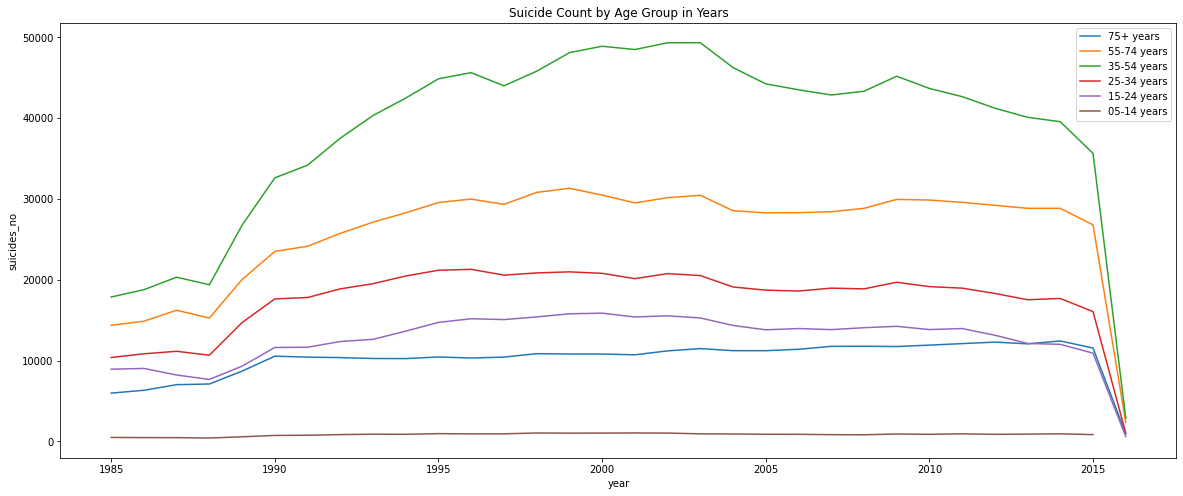

In [ ]:
# Showing differnt age groups and their number of suicides

df_sayg_no = pd.pivot_table(df,values= ['suicides_no'], 
                     index=['sex','age','year','generation'], aggfunc='sum').sort_index(level=3, ascending=False).reset_index()


fig, ax = plt.subplots(figsize=(20,8))
for i in ['75+ years', '55-74 years','35-54 years','25-34 years','15-24 years', '05-14 years']:
    ax = df_sayg_no[df_sayg_no.age==i].groupby('year').suicides_no.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_no')
ax.set_title('Suicide Count by Age Group in Years')
plt.show()

When we look at the suicide numbers of the age groups, the highest rate of suicide is between the ages of 35-54, but the rate is lower because the population of this group is high. Since the data for 2016 is incomplete, that year should not be taken into account.

## ***Suicide Count by Age Group and Gender in Years***

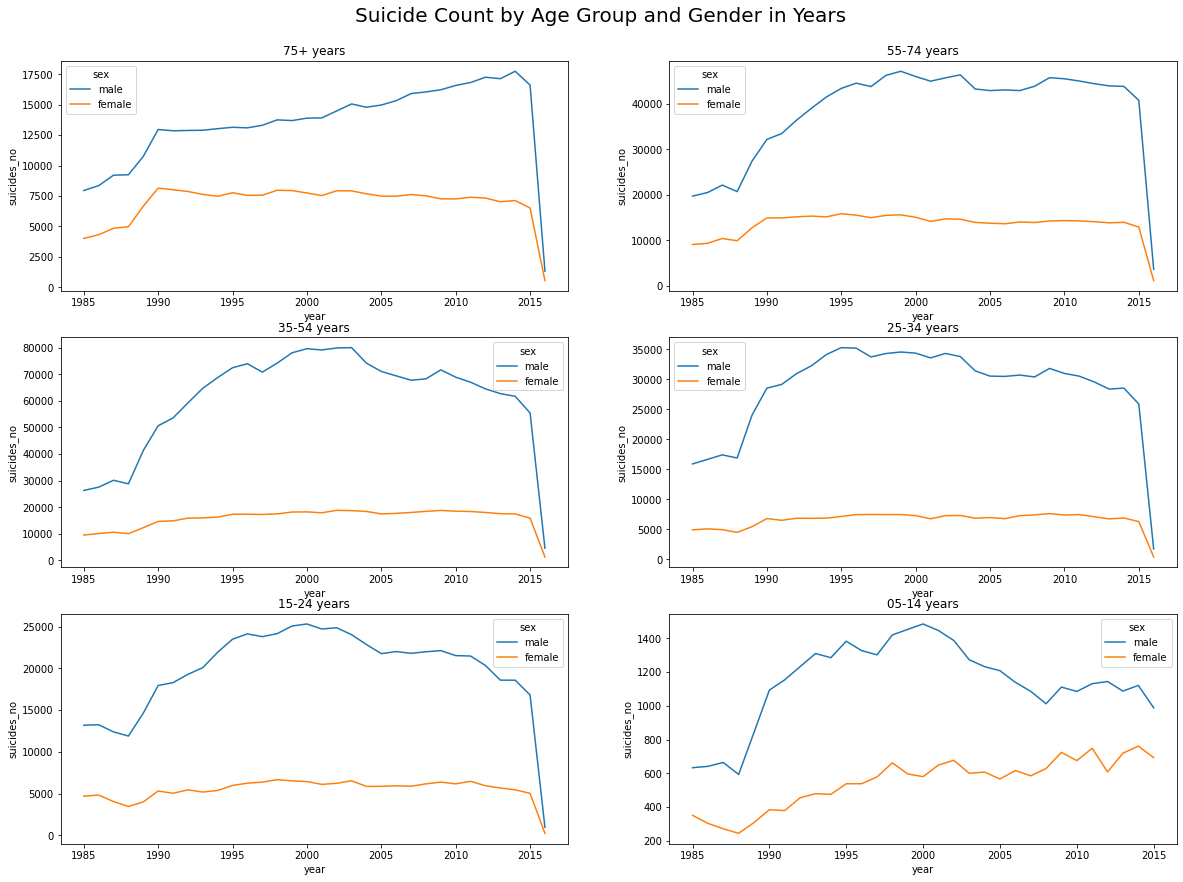

In [ ]:
# Plotting a different age groups, their gender and the number of suicides over the years

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle("Suicide Count by Age Group and Gender in Years", fontsize=20).set_y(0.9)
fig.subplots_adjust(top=0.85)
for i,v in enumerate(['75+ years', '55-74 years','35-54 years','25-34 years','15-24 years', '05-14 years']):
    plt.subplot(3,2,i+1)
    sns.lineplot(x='year', y='suicides_no', hue='sex',data=df_sayg_no[df_sayg_no.age==v])
    plt.title(v)
plt.show()

The gap between male and female suicides in 5-14 year-old suicides has tended to decrease since the 2000s.

## ***GDP per Capita of G8 Countries in Years***

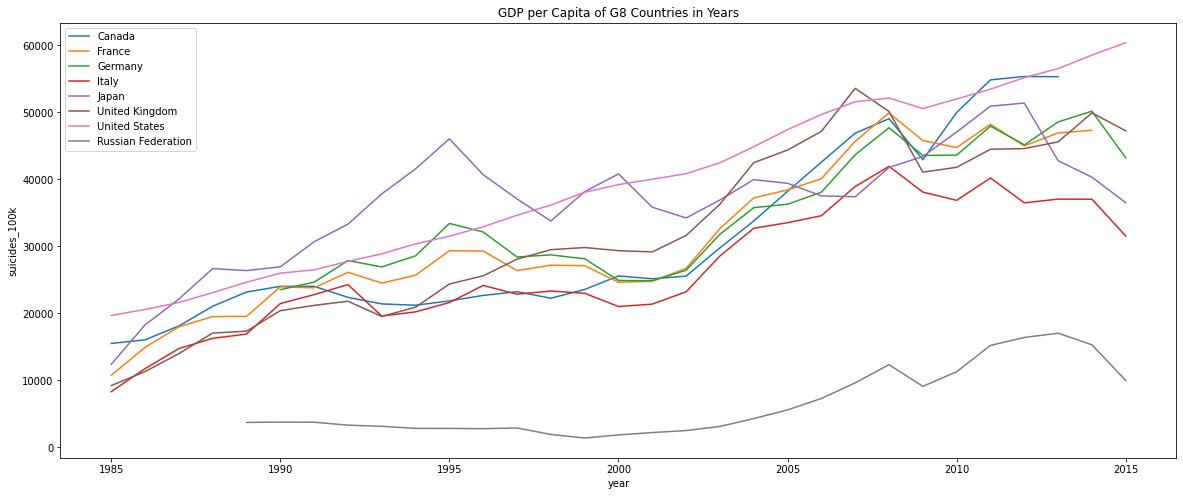

In [ ]:
# Plotting GDP per capita of the G8 countries comprising of
# ['Canada','France','Germany','Italy','Japan','United Kingdom','United States','Russian Federation']

df_cy = pd.pivot_table(df,values= ['population','gdp_per_capita', 'suicides_100k'], 
                     index=['country','year']).reset_index()


g8 = ['Canada','France','Germany','Italy','Japan','United Kingdom','United States','Russian Federation']

fig, ax = plt.subplots(figsize=(20,8))
for i in g8:
    ax = df_cy[df_cy.country==i].groupby('year').gdp_per_capita.mean().plot(kind='line',label=i)
ax.legend(loc='upper left', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('GDP per Capita of G8 Countries in Years')
plt.show()

We see the change in the GDPs of the G8 countries over the years, although there was a decrease in the GDP in the 2001 and 2007 crises, the GDPs tend to increase in general.

## ***Suicide Rates of G8 Countries in Years***

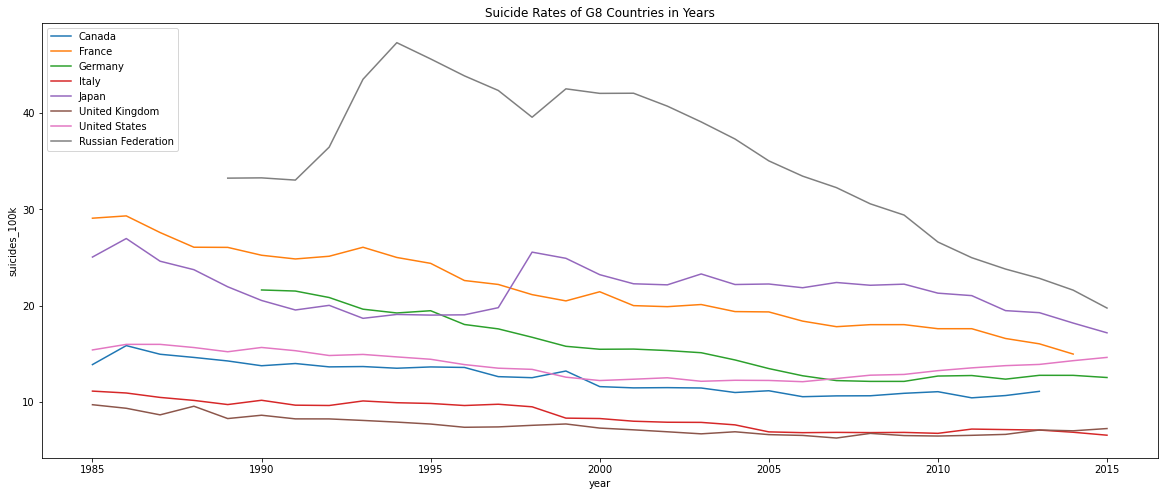

In [ ]:
# Plotting the suicide rates per 100k population over the years, of the G8 countries comprising of
# ['Canada','France','Germany','Italy','Japan','United Kingdom','United States','Russian Federation']

fig, ax = plt.subplots(figsize=(20,8))
for i in g8:
    ax = df_cy[df_cy.country==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper left', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('Suicide Rates of G8 Countries in Years')
plt.show()

It is observed that the suicide rates of G8 countries also tend to decrease over the years. Suicide rates in Russia seem to have increased dramatically after the collapse of the Soviet Union.

## ***Distribution of GDP, Population & Suicide Rate by Region***

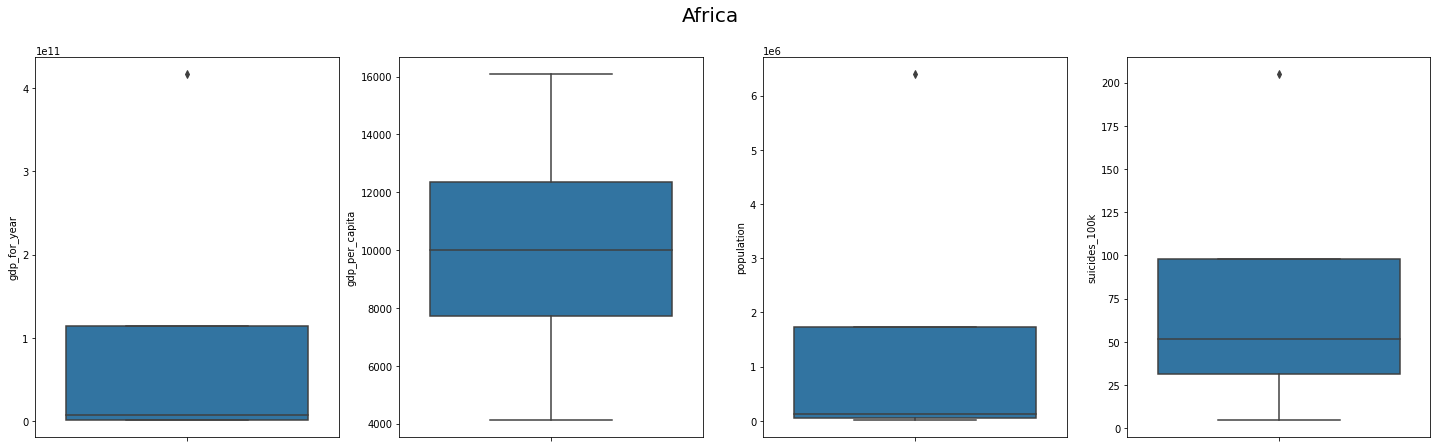

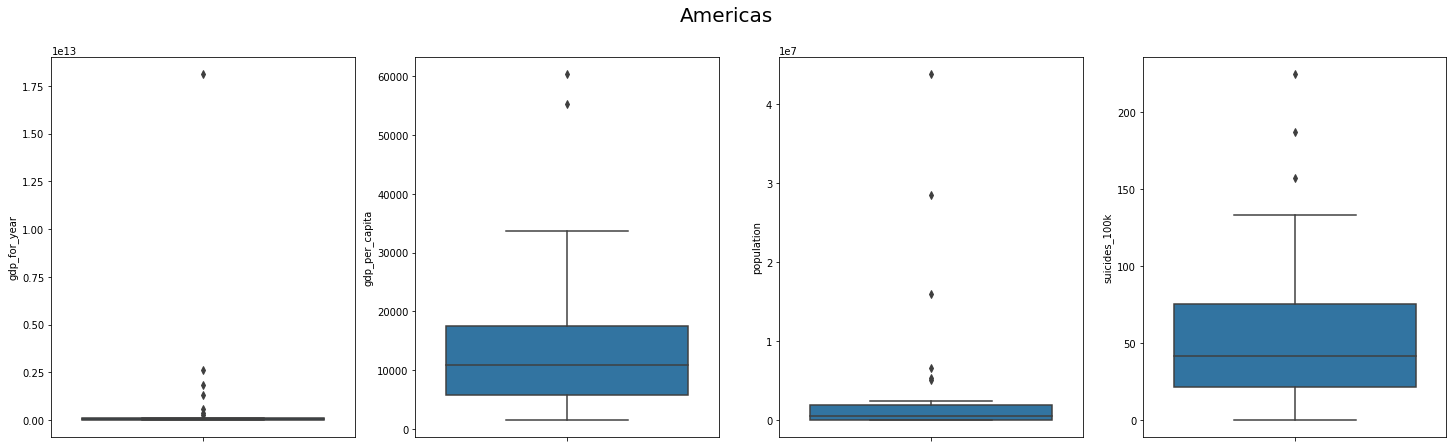

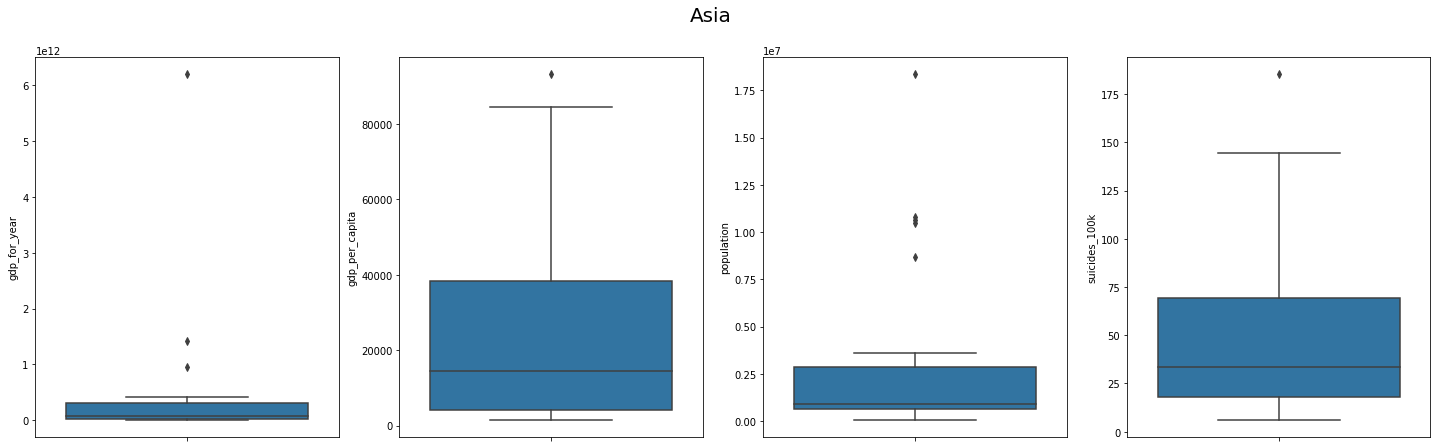

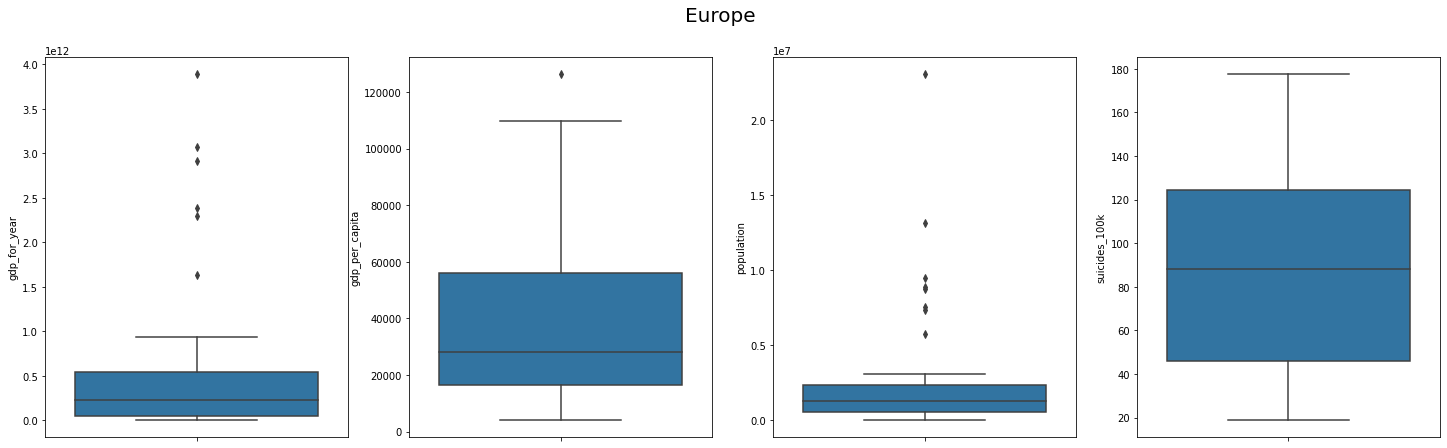

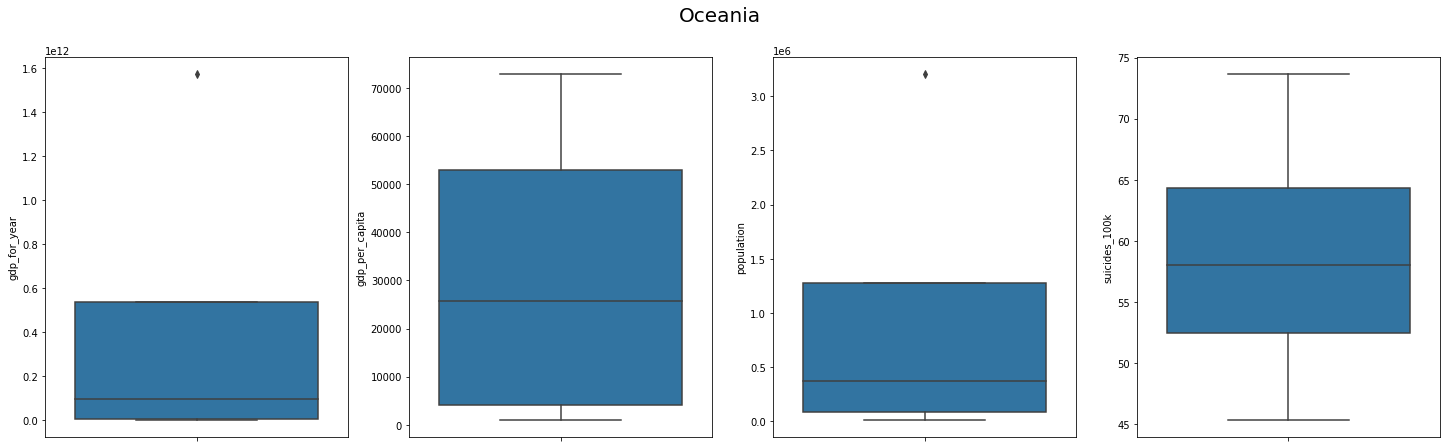

In [ ]:
# Distribution of GDP, Population & Suicide Rate by Region

df_cpgs = pd.pivot_table(df,values= ['population','gdp_per_capita', 'gdp_for_year','suicides_100k'], 
                     index=['region','country'],aggfunc='max').reset_index()

for j in df_cpgs.region.unique():
    plt.figure(figsize=(25,7))
    plt.suptitle(j, fontsize=20)
    for i,v in enumerate(df_cpgs.columns[2:]):  
        plt.subplot(1,4,i+1)
        sns.boxplot(y =v, data=df_cpgs[df_cpgs.region==j])
    plt.tight_layout
    plt.show()

* As there are only 4 countries from Africa in the dataset (insufficient number of samples), the current dataset does not provide insight into the entire African continent

## ***Suicidal Intensity Map by Suicides Rates in 100k***

* pip install pycountry --user
* pip install plotly-express --user
* pip install plotly --user
* pip install pyclustertend --user

In [ ]:
!pip install pycountry --user

     |████████████████████████████████| 10.1 MB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=32b894ea530be16b40981db5ad70a26b07747a613e7a83e127e7ea810393df9d
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
!pip install plotly-express --user

In [ ]:
!pip install plotly --user

In [ ]:
!pip install pyclustertend --user

In [ ]:
# Suicidal Intensity Map by Suicides Rates per 100k population

df_map = pd.pivot_table(df,values= ['suicides_100k'], 
                     index=['region','country','alpha_3'],aggfunc='mean').reset_index()

import plotly.express as px

fig = px.choropleth(data_frame = df_map,
                    locations= "alpha_3",
                    color= "suicides_100k",
                    hover_name= "country",
                    color_continuous_scale= 'thermal',
                   )

fig.show()

## ***Sampling Techniques***

In [ ]:
# Calculating the sample mean of final data

sample_mean = df.mean()
print(sample_mean)


# Finding the sample size

sample_size = len(df)
print(sample_size)

# Finding the standard error of the mean of data 

std_error = df.std() / np.sqrt(sample_size)
print('the standart error is ', std_error)

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  

#stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

year              2.001258e+03
suicides_no       2.425744e+02
population        1.844794e+06
suicides_100k     1.281610e+01
gdp_for_year      4.455810e+11
gdp_per_capita    1.686646e+04
dtype: float64
27820
the standart error is  year              5.077576e-02
suicides_no       5.408179e+00
population        2.345286e+04
suicides_100k     1.136827e-01
gdp_for_year      8.715039e+09
gdp_per_capita    1.132394e+02
dtype: float64


## ***Stratified sample***

In [ ]:
# using lambda parameter y

generations= df.groupby(['year','generation']).apply(lambda y: y.sample(frac=0.1))


# proportion of the non_stratified sample
print(generations['year'].value_counts())
print(generations['generation'].value_counts())

2009    108
2001    106
2010    106
2000    102
2011    102
2008    102
2007    102
2006    102
2005    102
2004    102
2003    102
2002    102
1999    101
1998     96
2012     96
2013     96
2014     95
1995     95
1997     91
1996     91
1994     83
1993     78
1992     78
1991     78
1990     78
2015     73
1987     66
1989     62
1988     60
1985     58
1986     58
2016     15
Name: year, dtype: int64
Generation X       642
Silent             637
Millenials         584
Boomers            500
G.I. Generation    276
Generation Z       147
Name: generation, dtype: int64


In [ ]:
# Preview data

generations.head()

country  year     sex          age  suicides_no  \
year generation                                                             
1985 Boomers    9094       France  1985  female  25-34 years          447   
                1435    Australia  1985  female  25-34 years           64   
                10029      Greece  1985  female  25-34 years           18   
                6009   Costa Rica  1985    male  25-34 years           32   
                11677     Iceland  1985    male  25-34 years            5   

                       population  suicides_100k  gdp_for_year  \
year generation                                                  
1985 Boomers    9094      4213300          10.61  553138414367   
                1435      1275900           5.02  180190994861   
                10029      679100           2.65   47820850975   
                6009       219000          14.61    4796628461   
                11677       20500          24.39    2939845038   

                       gdp_per_capita generation    region  \
year generation                                              
1985 Boomers    9094            10765    Boomers    Europe   
                1435            12374    Boomers   Oceania   
                10029            5156    Boomers    Europe   
                6009             2145    Boomers  Americas   
                11677           13357    Boomers    Europe   

                                            sub_region alpha_3  
year generation                                                 
1985 Boomers    9094                    Western Europe     FRA  
                1435         Australia and New Zealand     AUS  
                10029                  Southern Europe     GRC  
                6009   Latin America and the Caribbean     CRI  
                11677                  Northern Europe     ISL

## ***Hypothesis Test***

In [ ]:
# Lets impute generation have not been assigned with a continent name
df.reset_index()

df.loc[17,'generation'] = 'Generation X'
df.loc[73,'generation'] = 'Millenials'
df.loc[75,'generation'] = 'G.I. Generation'
df.loc[78,'generation'] = 'Silent'
df.loc[83,'generation'] = 'Boomers'
df.loc[83,'generation'] = 'Generation Z'

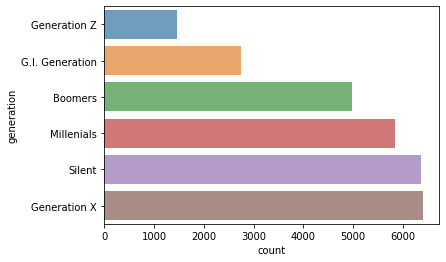

In [ ]:
# Lets look generation
sns.countplot(y='generation',data =df, alpha=0.7, order=reversed(df['generation'].value_counts().index))

In [ ]:
generation_z = df.loc[df['generation']=='Generation Z']
millenials = df.loc[df['generation']=='Millenials']
generation_x = df.loc[df['generation']=='Generation X']
boomers = df.loc[df['generation']=='Boomers']
silent = df.loc[df['generation']=='Silent']
gi_generation = df.loc[df['generation']=='G.I. Generation']

## ***Suicide rate t-Test comparison between two samples from different generation***

Ho : Generation X's suicide rates are equal to the average suicide rates of Boomers.

Ha : Generation X's suicide rates are not equal to the average suicide rates of Boomers.

We reject Null Hypothesis(Ho) if p < 0.05

## ***Looping T-test***

 ***Method:***

1- Conduct ten t-tests based on generation random permutations within each generation groups

2- Identify % of test in favor of accepting hypothesis

In [ ]:
# Looping 10 T-test

t_test_result=[]
def t_test_loop(group_1,group_2,sample_size):
    
    group1_generation = group_1['generation'].iloc[0]
    group2_generation = group_2['generation'].iloc[0]
    print ('%s vs %s (sample size=%s) :  \n'%(group1_generation,group2_generation,sample_size))
    for i in range(11):
        
        random_group1_generations = group_1.sample(sample_size)
        random_group2_generations = group_2.sample(sample_size)
        
        group1_suicide = random_group1_generations['suicides_100k'].tolist()
        group2_suicide = random_group2_generations['suicides_100k'].tolist()
    
        p_val = stats.ttest_ind(group1_suicide,group2_suicide,equal_var=False).pvalue
        t_test_result.append(round(p_val,2))
        print ('Welch t-Test results:',stats.ttest_ind(group1_suicide,group2_suicide,equal_var=False))
        
    
  
    return  print ('\nP-value results of series of t-Tests: ',t_test_result)
    
t_test_loop(generation_x, boomers, 9)


Generation X vs Boomers (sample size=9) :  

Welch t-Test results: Ttest_indResult(statistic=-1.1057737588739165, pvalue=0.2875742685502211)
Welch t-Test results: Ttest_indResult(statistic=-0.5216050288618619, pvalue=0.6091909036434044)
Welch t-Test results: Ttest_indResult(statistic=-1.9065949923957561, pvalue=0.08698445981020059)
Welch t-Test results: Ttest_indResult(statistic=-1.345110389411276, pvalue=0.19773490801176347)
Welch t-Test results: Ttest_indResult(statistic=-1.8055255999365045, pvalue=0.10031850121969735)
Welch t-Test results: Ttest_indResult(statistic=0.3421184620722324, pvalue=0.7374508233913357)
Welch t-Test results: Ttest_indResult(statistic=2.1072321777248884, pvalue=0.06593248645122844)
Welch t-Test results: Ttest_indResult(statistic=-0.3691079168064868, pvalue=0.7170265471433074)
Welch t-Test results: Ttest_indResult(statistic=0.13846283424737466, pvalue=0.8919021328270611)
Welch t-Test results: Ttest_indResult(statistic=-1.6804299505970857, pvalue=0.112701469969

## ***Single t-Test with countries printed***

In [ ]:
def t_test(group_1,group_2,sample_size):
    
    group1_generation = group_1['generation'].iloc[0]
    group2_generation = group_2['generation'].iloc[0]
    
    random_group1_generations = group_1.sample(sample_size)
    random_group2_generations = group_2.sample(sample_size)
    
    group1_suicide = random_group1_generations['suicides_100k'].tolist()
    group2_suicide = random_group2_generations['suicides_100k'].tolist()

    p_val = stats.ttest_ind(group1_suicide,group2_suicide,equal_var=False).pvalue
    
    group_1_mean = round(random_group1_generations['suicides_100k'].mean(),2)
    group_1_std = round(random_group1_generations['suicides_100k'].std(),2)
    group_2_mean = round(random_group2_generations['suicides_100k'].mean(),2)
    group_2_std = round(random_group2_generations['suicides_100k'].std(),2)
    
    print ('%s vs %s (sample size=%s) :  \n'%(group1_generation,group2_generation,sample_size))
    
    print ('1st group generations:',random_group1_generations['country'].tolist())
    print ('2nd group generations:',random_group2_generations['country'].tolist())
    
    print ('\n1st group average suicide/100k of population:  %s +- %s '%(group_1_mean,group_1_std))
    print ('2st group average suicide/100k of population:  %s +- %s '%(group_2_mean,group_2_std))

    print ('\nWelch t-Test results:',stats.ttest_ind(group1_suicide,group2_suicide,equal_var=False))
    
    if p_val<0.05:
        print ('\np values = {} ==> reject Ho'.format(round(p_val,2)))
    else:
        print ('\np values = {} ==> can NOT reject Ho'.format(round(p_val,2)))
    
t_test(generation_x,boomers,10)

Generation X vs Boomers (sample size=10) :  

1st group generations: ['El Salvador', 'Azerbaijan', 'Portugal', 'Fiji', 'Azerbaijan', 'Thailand', 'Slovenia', 'Luxembourg', 'France', 'Switzerland']
2nd group generations: ['Czech Republic', 'Singapore', 'Portugal', 'Qatar', 'Ecuador', 'Colombia', 'Costa Rica', 'Russian Federation', 'Romania', 'Slovenia']

1st group average suicide/100k of population:  11.04 +- 12.17 
2st group average suicide/100k of population:  12.59 +- 16.97 

Welch t-Test results: Ttest_indResult(statistic=-0.23411097705321268, pvalue=0.8178108452994037)

p values = 0.82 ==> can NOT reject Ho


Our P value= 0.82 therefore we fail to reject the Null Hypotheis.